# Dataset Overview & Descriptive Analysis 

imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


# DATA EXPLORATION


In [2]:
%matplotlib inline
sns.set(style="whitegrid")

--Loading the Dataset--



In [3]:
df = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')
df.head()


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

--shows the number of entries, column types, and non-null counts--

In [4]:
df.info()
#5110 entries and 12 columns
#bmi has null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


--Statistical Summary-- 
count:Number of non-null  entries in the column
mean:The average value
std:The standard deviation 
min:The smallest value
25%:The first quartile (25% of values are below this)
50%:(median)The middle value (half above, half below)
75%:The third quartile (75% of values are below this)
max:The largest value


In [5]:
df.describe().T

count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke                 0.000      0.00      1.00

--Number of Null values in each column--

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

--number of unique values in each column--

In [7]:
df.nunique()
#gender has 3 unique values, which is not expected



id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

--unique values in each column--


In [8]:
for i in df.columns:
    print("Number of Unique Values in ",i,':',df[i].nunique())
    print("Unique Values in ",i,':',df[i].unique()) if df[i].nunique()<10 else print()

Number of Unique Values in  id : 5110

Number of Unique Values in  gender : 3
Unique Values in  gender : ['Male' 'Female' 'Other']
Number of Unique Values in  age : 104

Number of Unique Values in  hypertension : 2
Unique Values in  hypertension : [0 1]
Number of Unique Values in  heart_disease : 2
Unique Values in  heart_disease : [1 0]
Number of Unique Values in  ever_married : 2
Unique Values in  ever_married : ['Yes' 'No']
Number of Unique Values in  work_type : 5
Unique Values in  work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Number of Unique Values in  Residence_type : 2
Unique Values in  Residence_type : ['Urban' 'Rural']
Number of Unique Values in  avg_glucose_level : 3979

Number of Unique Values in  bmi : 418

Number of Unique Values in  smoking_status : 4
Unique Values in  smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Number of Unique Values in  stroke : 2
Unique Values in  stroke : [1 0]


--Check for duplicated values--

In [9]:
df.duplicated().sum()
#No duplicate values

np.int64(0)

--Check for categorical columns--
(Categorical columns are columns where the values represent categories or groups, not continuous numbers)

In [10]:
#df.select_dtypes(include='object').columns :didnt work correctly(0,1 not included)
categorical_cols = [col for col in df.columns if df[col].nunique() < 10]
categorical_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

--percentage of patients who had a stroke--
(target variable distribution)

In [11]:
print(df['stroke'].value_counts())

df['stroke'].value_counts(normalize=True) * 100


stroke
0    4861
1     249
Name: count, dtype: int64


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

-- check number of patients in each age group--

In [12]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 40, 60, 100], 
                         labels=['Child', 'Adult', 'Middle Age', 'Senior'])
df['age_group'].value_counts()


age_group
Middle Age    1562
Adult         1328
Senior        1304
Child          916
Name: count, dtype: int64

--Check how many values are zero--

In [13]:
(df[['age', 'bmi', 'avg_glucose_level']] == 0).sum()
#zero is invalid value for age, bmi and avg_glucose_level

age                  0
bmi                  0
avg_glucose_level    0
dtype: int64

--Stroke count by work type--

In [14]:
pd.crosstab(df['work_type'], df['stroke'])


stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2

--Stroke ratio by smoking status--

In [15]:
pd.crosstab(df['smoking_status'], df['stroke'], normalize='index') * 100
#smoking status is not a good predictor of stroke

stroke                   0         1
smoking_status                      
Unknown          96.955959  3.044041
formerly smoked  92.090395  7.909605
never smoked     95.243129  4.756871
smokes           94.676806  5.323194

--Stroke count by gender--

In [16]:
pd.crosstab(df['gender'], df['stroke'])


stroke     0    1
gender           
Female  2853  141
Male    2007  108
Other      1    0

--stroke ratio by age group--

In [17]:

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 40, 60, 100],
    labels=['Child', 'Adult', 'Middle Age', 'Senior']
)

stroke_ratio = pd.crosstab(df['age_group'], df['stroke'], normalize='index')

stroke_ratio.columns = ['No Stroke', 'Stroke']

print(" Stroke Rate by Custom Age Group (%):")
print(stroke_ratio.round(3))



 Stroke Rate by Custom Age Group (%):
            No Stroke  Stroke
age_group                    
Child           0.998   0.002
Adult           0.995   0.005
Middle Age      0.959   0.041
Senior          0.864   0.136


--Check correlation of each numeric feature with the target--

In [18]:

df.corr(numeric_only=True)['stroke'].sort_values(ascending=False)
#Values range from -1(prefect negative correleation) to +1(perfect positive correleation)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

decided to drop id as it has very little correlation with  stroke

# Data visualization

Correlation Heatmap

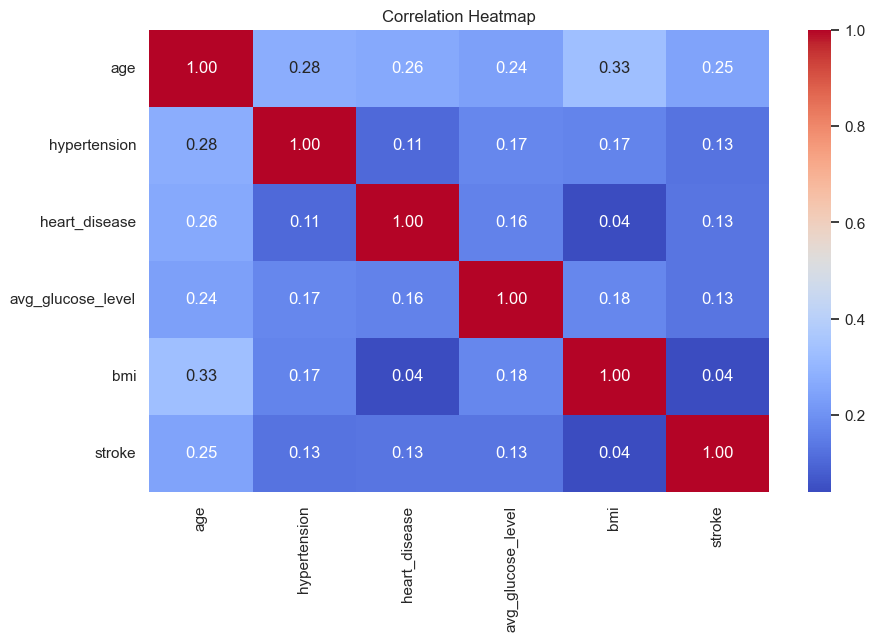

In [19]:

# numerical features without id
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Scatter Plots

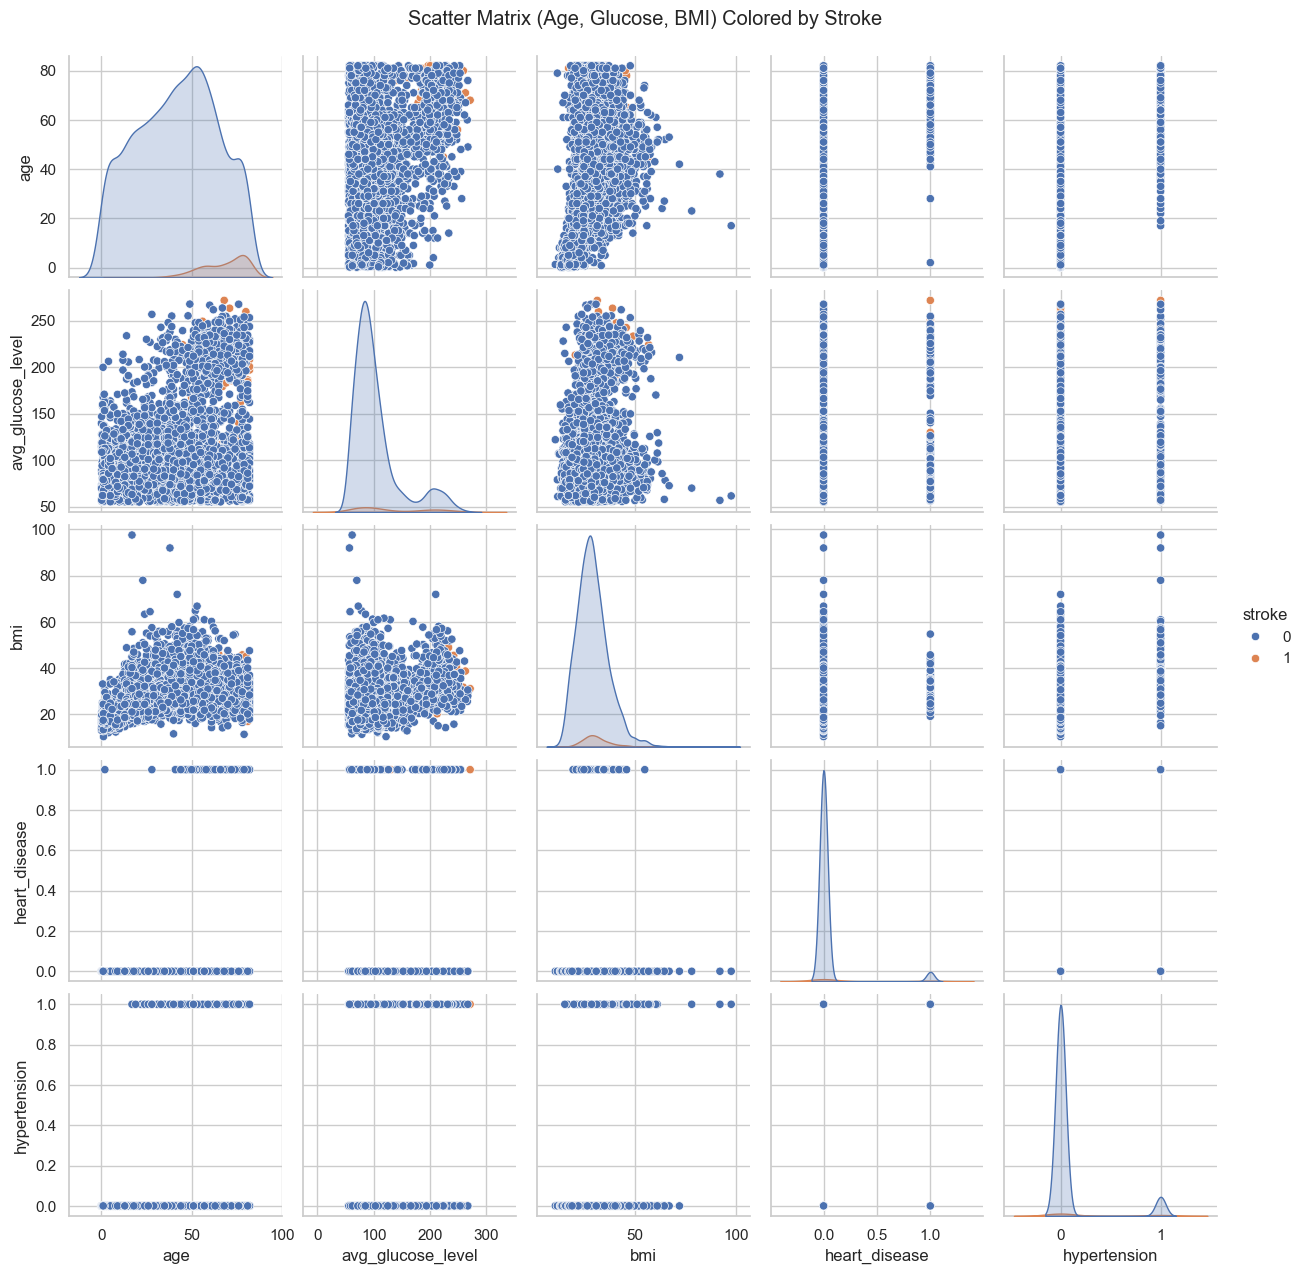

In [20]:
scatter_features = ['age', 'avg_glucose_level', 'bmi','heart_disease','hypertension'] #numerical values only
#  pairplot with stroke as hue
pairplot = sns.pairplot(df[scatter_features + ['stroke']].dropna(), hue='stroke', diag_kind='kde')
pairplot.fig.suptitle("Scatter Matrix (Age, Glucose, BMI) Colored by Stroke", y=1.02)

pairplot.savefig("../visuals/scatter_matrix_cleaned.png")
plt.show()

saving each plot in visuals file for better visualization

In [21]:
features = ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']
# Generate scatter plots for all unique pairs
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        x = features[i]
        y = features[j]
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=x, y=y, hue='stroke', data=df)
        plt.title(f"{x.capitalize()} vs {y.capitalize()} Colored by Stroke")
        
        # Save without showing
        filename = f"scatter_{x}_vs_{y}.png"
        plt.savefig(f"../visuals/{filename}")
        plt.close()

Box plot

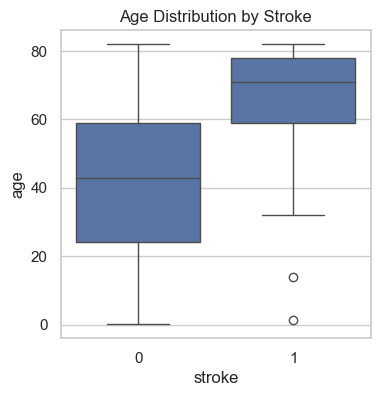

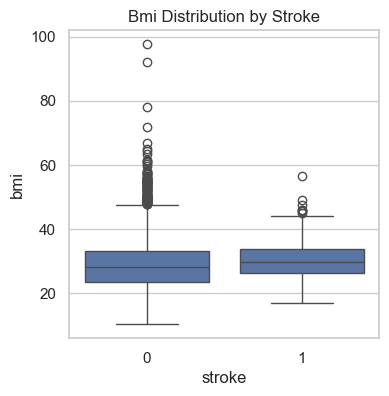

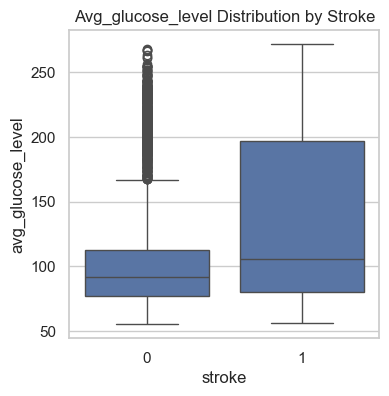

In [22]:
# Features to visualize
features = ['age', 'bmi', 'avg_glucose_level']

# Loop through and save each box plot
for feature in features:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='stroke', y=feature, data=df)
    plt.title(f"{feature.capitalize()} Distribution by Stroke")
    plt.savefig(f"../visuals/boxplot_{feature}_by_stroke.png")
    plt.show()

Count plot

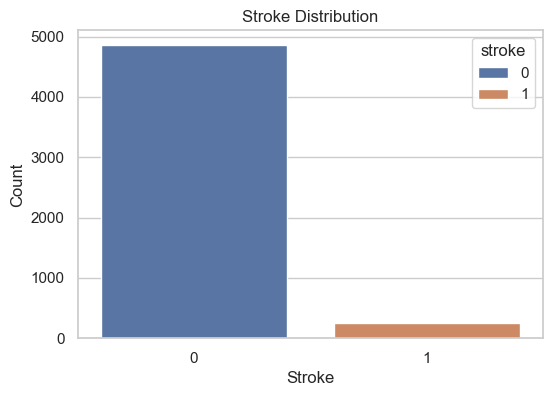

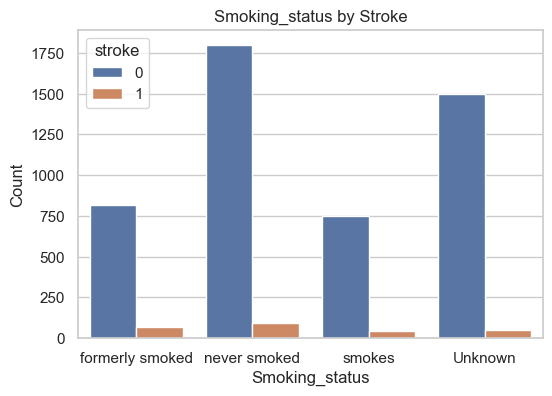

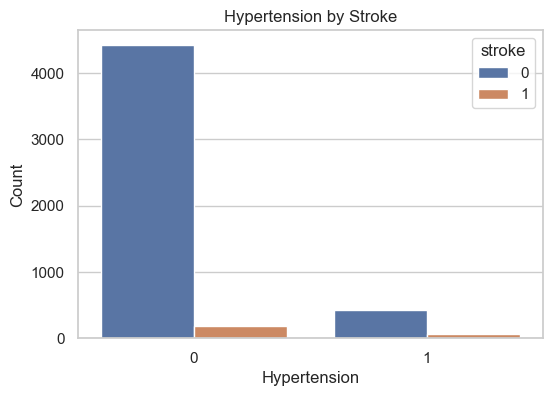

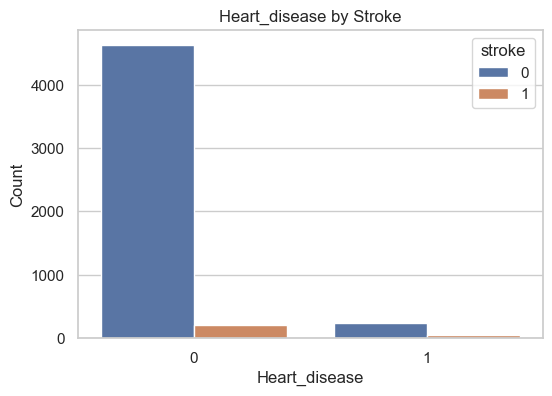

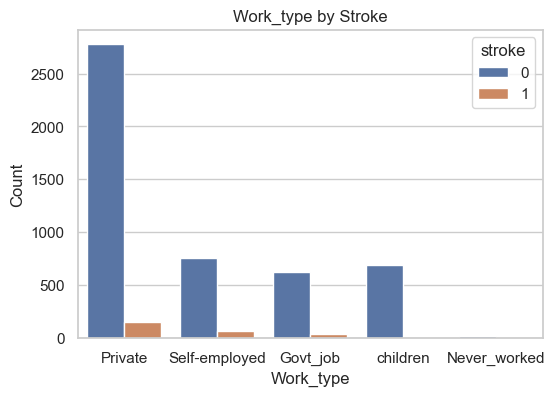

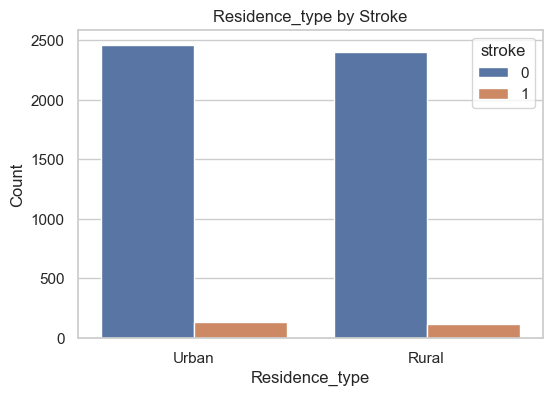

In [23]:
# List of features to visualize in count plots
features = ['stroke', 'smoking_status', 'hypertension', 'heart_disease', 'work_type', 'Residence_type']

# Loop through each feature and plot the count plot
for feature in features:
    plt.figure(figsize=(6, 4))  # Optional: adjust the size of the plot
    sns.countplot(x=feature, hue='stroke', data=df)
    plt.title(f'{feature.capitalize()} by Stroke' if feature != 'stroke' else 'Stroke Distribution')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    
    # Display the plot
    plt.show()


Histogram

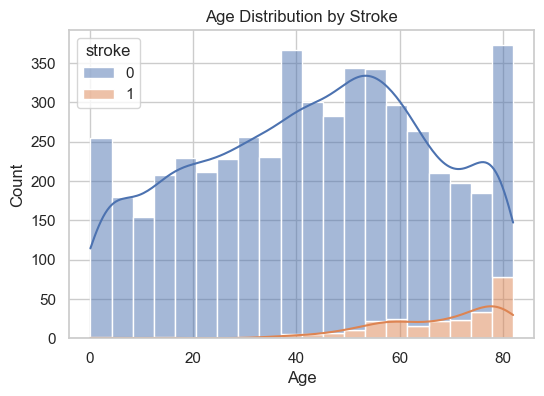

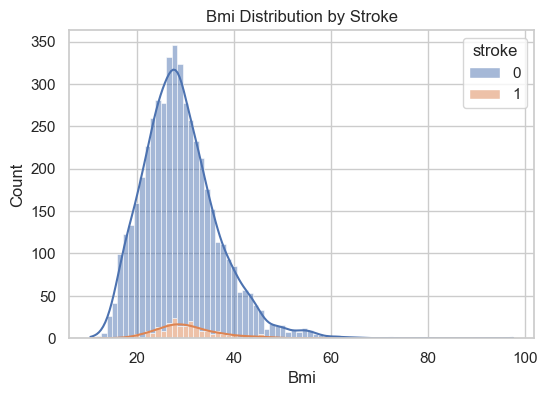

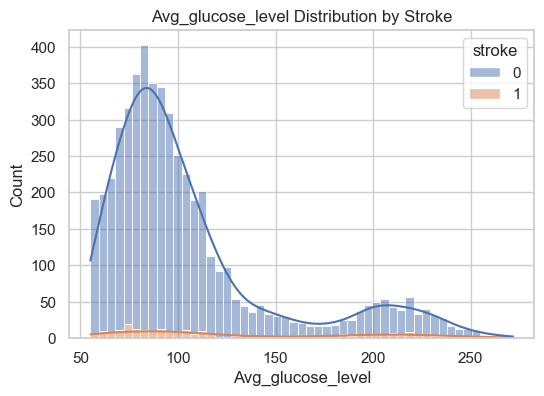

In [24]:

# List of features to visualize in histogram and KDE plots
features = ['age', 'bmi', 'avg_glucose_level']

# Loop through each feature and plot the histogram / KDE plot
for feature in features:
    plt.figure(figsize=(6, 4))  
    sns.histplot(data=df, x=feature, hue='stroke', multiple='stack', kde=True)
    plt.title(f'{feature.capitalize()} Distribution by Stroke')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.savefig(f"../visuals/histplot_{feature}_by_stroke.png")
    plt.show()


violin plots

C:\Users\User\AppData\Local\Temp\ipykernel_3524\1055150602.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y=feature, data=df, inner='quartile', palette='muted')


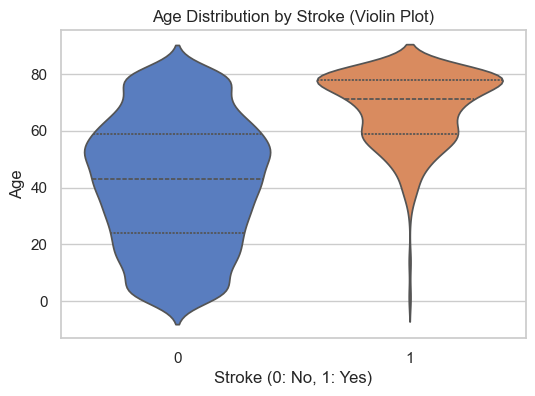

C:\Users\User\AppData\Local\Temp\ipykernel_3524\1055150602.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y=feature, data=df, inner='quartile', palette='muted')


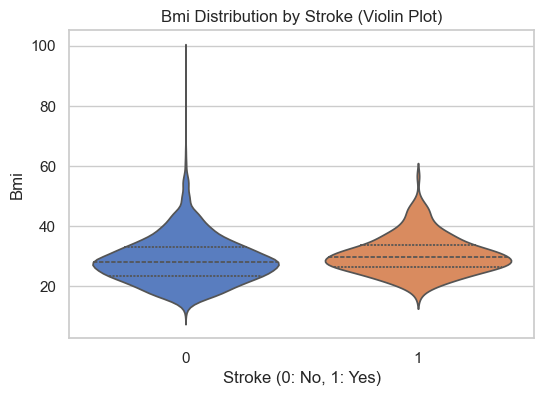

C:\Users\User\AppData\Local\Temp\ipykernel_3524\1055150602.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='stroke', y=feature, data=df, inner='quartile', palette='muted')


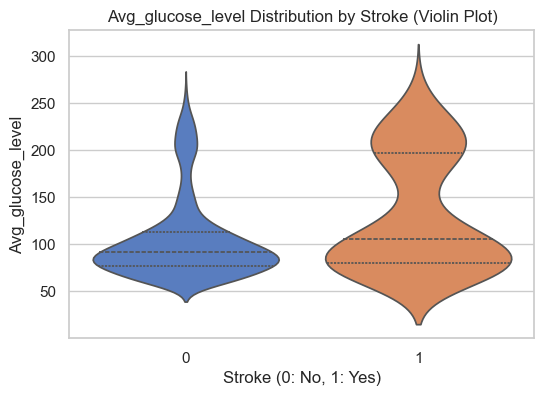

In [25]:
# Features to visualize with violin plots
features = ['age', 'bmi', 'avg_glucose_level']

# Loop through and save each violin plot
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='stroke', y=feature, data=df, inner='quartile', palette='muted')
    plt.title(f"{feature.capitalize()} Distribution by Stroke (Violin Plot)")
    plt.xlabel('Stroke (0: No, 1: Yes)')
    plt.ylabel(feature.capitalize())
    
    # Save the plot to a file
    plt.savefig(f"../visuals/violinplot_{feature}_by_stroke.png")
    
    # Display the plot
    plt.show()


pie charts

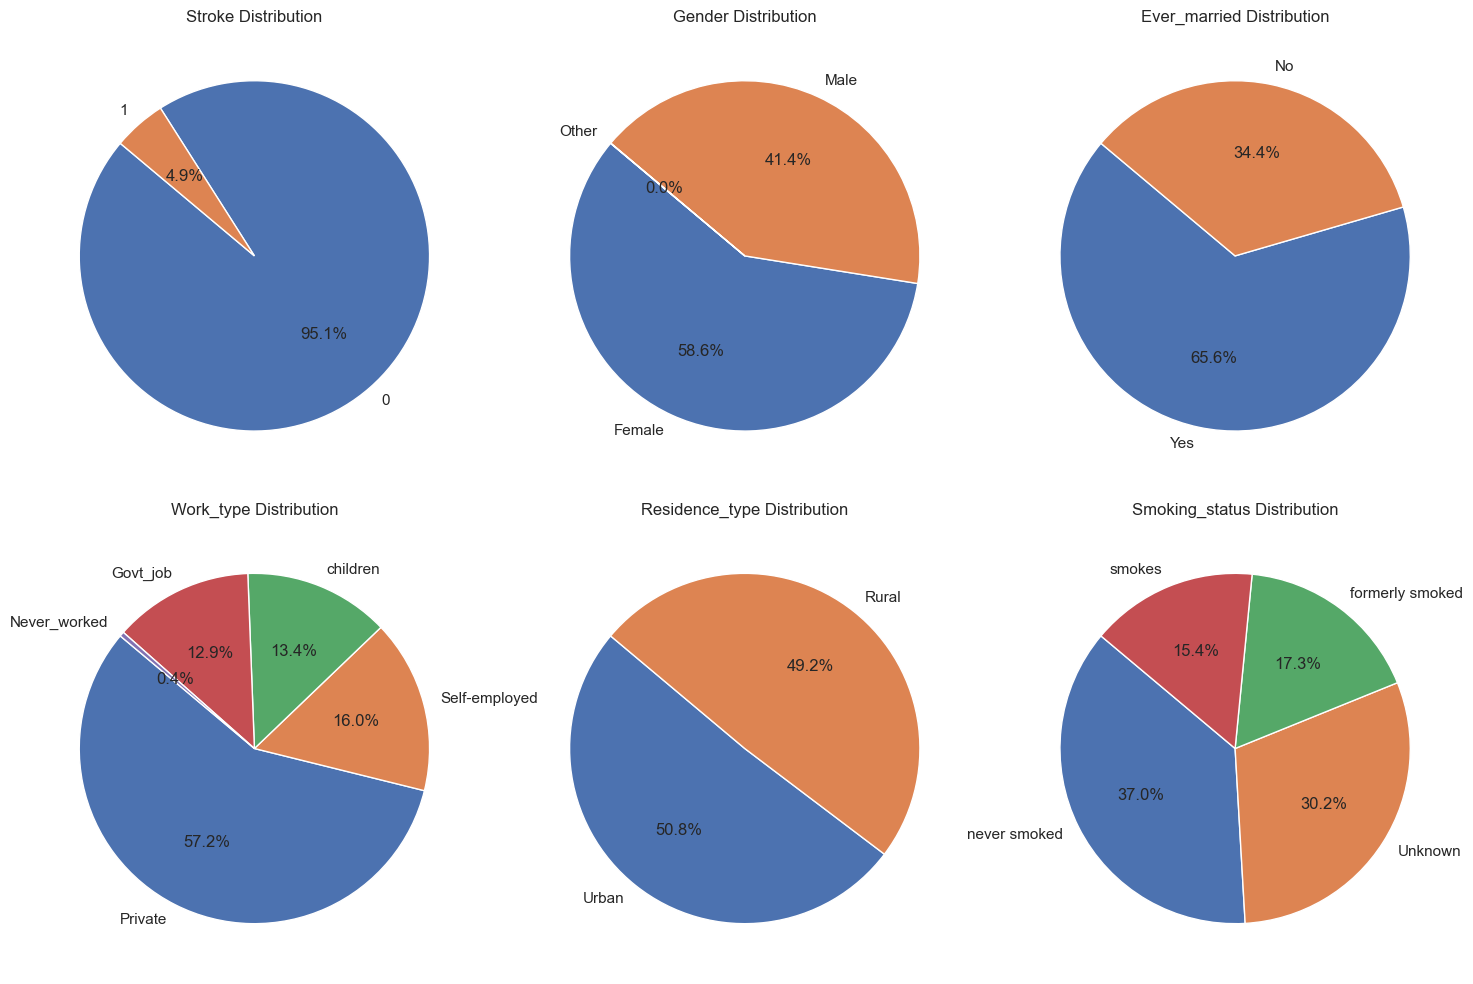

In [26]:
# Features to generate pie charts for
features = ['stroke','gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Setup subplot grid (2 rows, 3 columns to fit 5 features)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Create pie charts
for i, feature in enumerate(features):
    counts = df[feature].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{feature.capitalize()} Distribution')
    axes[i].axis('equal')  # Keep the pie chart round

# Hide the empty sixth subplot (if there is one)
if len(features) < len(axes):
    axes[-1].axis('off')

# Adjust layout and save
plt.tight_layout()
plt.show()


# LDA

In [27]:

# Define the features and target variable
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Clean the dataset by dropping rows with missing values
df_clean = df[features + ['stroke']].dropna()

X = df_clean[features]
y = df_clean['stroke'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)  
X_lda = lda.fit_transform(X_scaled, y)

print(f"Explained variance ratio: {lda.explained_variance_ratio_}")

coef = pd.DataFrame(
    lda.coef_,
    columns=features,
    index=['LD1']
).T

Explained variance ratio: [1.]


In [28]:

lda_direction = lda.coef_[0]
lda_direction = lda_direction / np.linalg.norm(lda_direction)

X_orthogonal = X_scaled - np.outer(X_lda.flatten(), lda_direction)

pca_orthogonal = PCA(n_components=1)
X_lda_2d = pca_orthogonal.fit_transform(X_orthogonal)

X_lda_2d = np.column_stack((X_lda, X_lda_2d))

# Create LDA DataFrame for visualization
lda_df = pd.DataFrame(data=X_lda_2d, columns=['LD1', 'LD2'])
lda_df['stroke'] = df['stroke'].reset_index(drop=True)

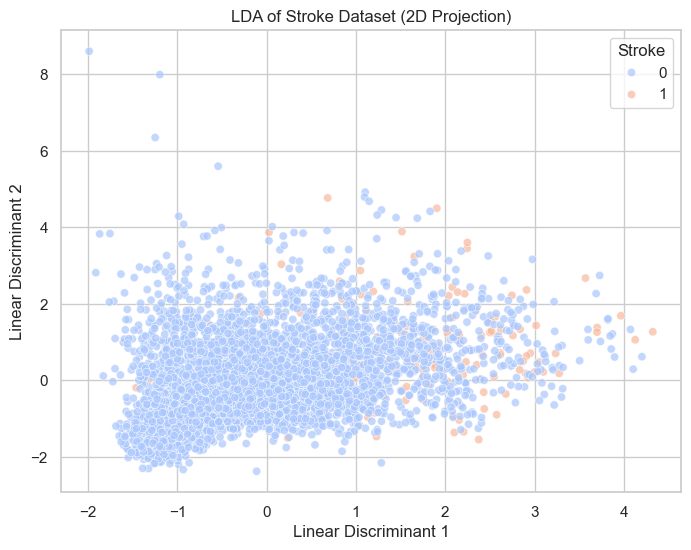

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='LD1', y='LD2',
    hue='stroke',
    data=lda_df,
    palette='coolwarm',
    alpha=0.7
)
plt.title('LDA of Stroke Dataset (2D Projection)')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Stroke')
plt.grid(True)
plt.show()

# PCA


--Preparing the Data--

In [30]:
# Select numeric features (exclude 'id', target 'stroke', and maybe 'age_group' or any categorical)
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Drop rows with missing values (if any)
df_clean = df[features + ['stroke']].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features].values)


--Apply PCA to reduce to 2 dimensions--

In [31]:
# Create PCA model
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)


--Create a DataFrame for visualization--

In [32]:
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['stroke'] = df_clean['stroke'].values


--visualize with seaborn--

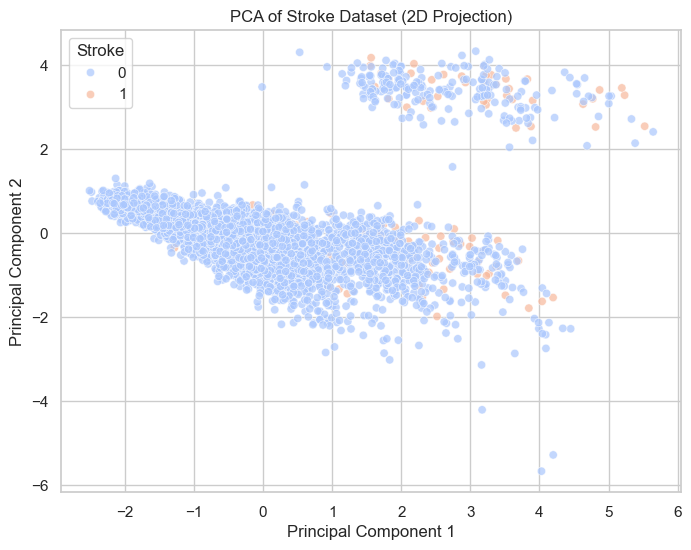

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='stroke',
    data=pca_df,
    palette='coolwarm',
    alpha=0.7
)
plt.title('PCA of Stroke Dataset (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Stroke')
plt.grid(True)
plt.show()


# Data Cleaning And Preprocessing


# Handling missing values

In [34]:
#checking for missing values in all
df.isnull().sum()
#Only bmi has missing values


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
age_group              0
dtype: int64

In [35]:
#checking unique values in all columns
for i in df.columns:
    print("Number of Unique Values in ",i,':',df[i].nunique())
    print("Unique Values in ",i,':',df[i].unique()) if df[i].nunique()<10 else print()
    #to check if there is any invalid values

Number of Unique Values in  id : 5110

Number of Unique Values in  gender : 3
Unique Values in  gender : ['Male' 'Female' 'Other']
Number of Unique Values in  age : 104

Number of Unique Values in  hypertension : 2
Unique Values in  hypertension : [0 1]
Number of Unique Values in  heart_disease : 2
Unique Values in  heart_disease : [1 0]
Number of Unique Values in  ever_married : 2
Unique Values in  ever_married : ['Yes' 'No']
Number of Unique Values in  work_type : 5
Unique Values in  work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Number of Unique Values in  Residence_type : 2
Unique Values in  Residence_type : ['Urban' 'Rural']
Number of Unique Values in  avg_glucose_level : 3979

Number of Unique Values in  bmi : 418

Number of Unique Values in  smoking_status : 4
Unique Values in  smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Number of Unique Values in  stroke : 2
Unique Values in  stroke : [1 0]
Number of Unique Values in  age

In [36]:

# Check for zero or negative values in 'age', 'bmi', and 'avg_glucose_level' (these are the numerical values)
print((df[['age', 'bmi', 'avg_glucose_level']] <= 0).sum())


age                  0
bmi                  0
avg_glucose_level    0
dtype: int64


In [37]:
#correlation before handling missing data
correlation_before = df[['bmi', 'stroke']].corr()
print("Correlation between BMI and Stroke before handling missing data:\n", correlation_before)

Correlation between BMI and Stroke before handling missing data:
              bmi    stroke
bmi     1.000000  0.042374
stroke  0.042374  1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_3524\1758860936.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='coolwarm')


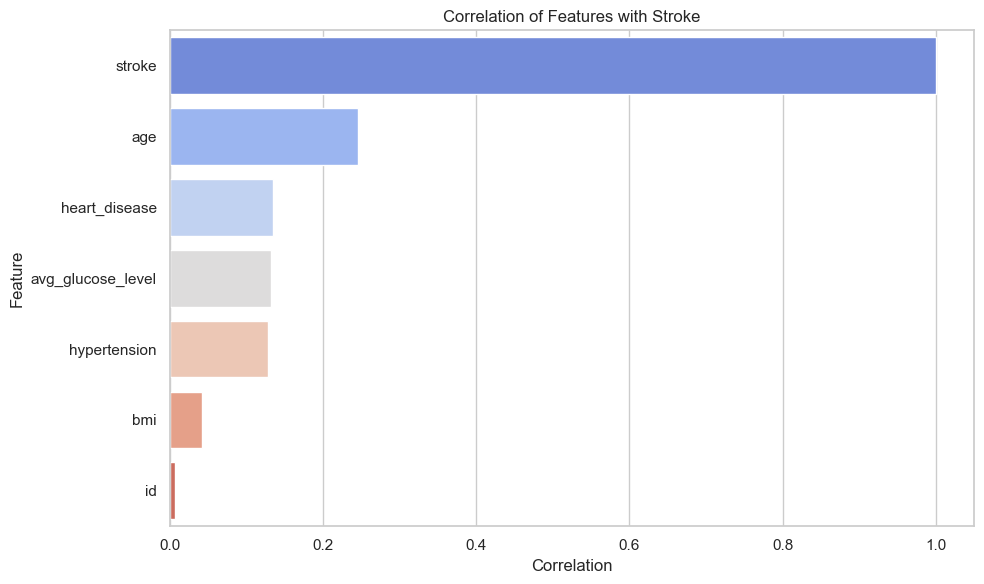

In [38]:
# Calculate correlation of all columns with 'stroke'
correlation_with_stroke = df.corr(numeric_only=True)['stroke'].sort_values(ascending=False)

# Create a DataFrame for visualization
correlation_df = correlation_with_stroke.reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=correlation_df, palette='coolwarm')
plt.title('Correlation of Features with Stroke')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


--only bmi and smoking has missing values--
we will try filling them with mean and with median
then getting correleation with target column (stroke) and see which approach gives best correlation

--mean--

In [39]:
# Create a copy of the DataFrame
df_mean_bmi = df.copy()

# Replacing missing values in the 'bmi' column with the mean
df_mean_bmi['bmi'] = df_mean_bmi['bmi'].fillna(df_mean_bmi['bmi'].mean())
print("Mean BMI after dropping null values:", df_mean_bmi['bmi'].mean())
#didnt need to remove missing values before calculating mean as mean function ignores null values by default



Mean BMI after dropping null values: 28.893236911794663


In [40]:
#correlation after filling with mean
correlation_mean = df_mean_bmi[['bmi', 'stroke']].corr()
print("🔍 Correlation between BMI and Stroke after mean filling:\n", correlation_mean)


🔍 Correlation between BMI and Stroke after mean filling:
              bmi    stroke
bmi     1.000000  0.038947
stroke  0.038947  1.000000


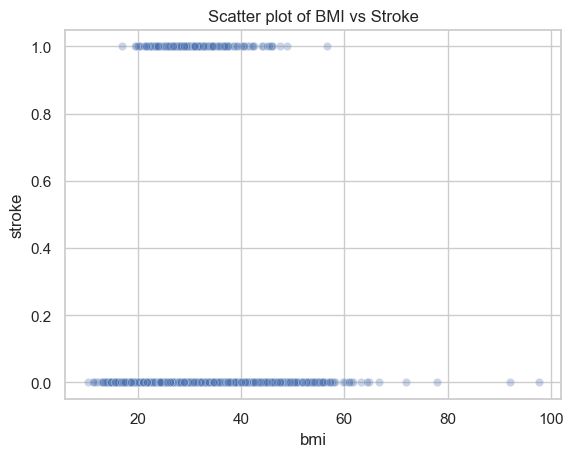

In [41]:
sns.scatterplot(data=df_mean_bmi, x='bmi', y='stroke', alpha=0.3)
plt.title('Scatter plot of BMI vs Stroke')
plt.show()
#doesnt explain it very well

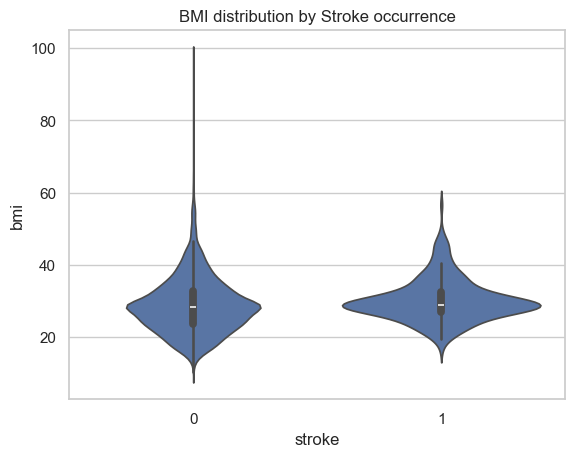

In [42]:
sns.violinplot(data=df_mean_bmi, x='stroke', y='bmi')
plt.title('BMI distribution by Stroke occurrence')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_3524\2463343681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_mean.index, y=correlation_mean['stroke'].values, palette='coolwarm')


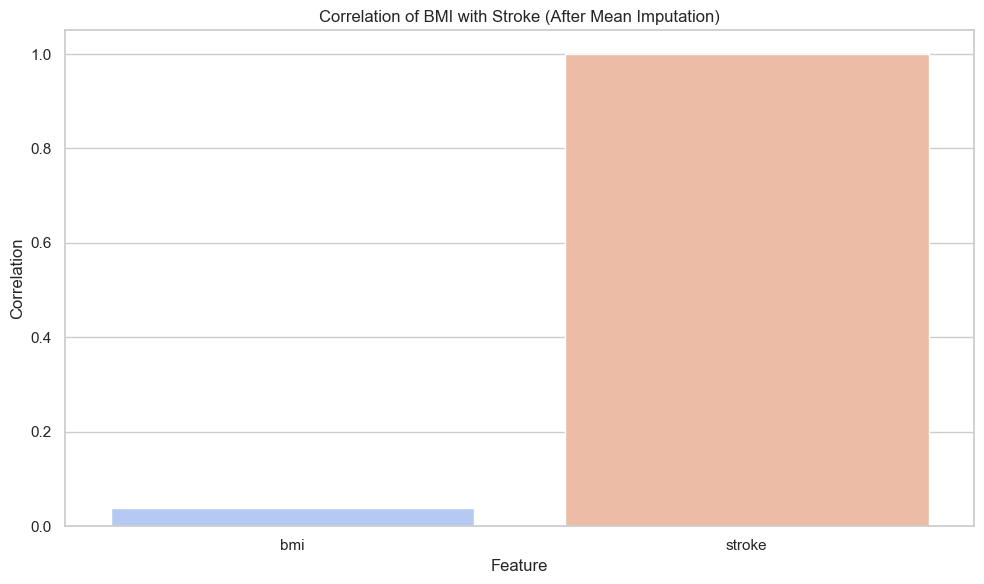

In [43]:
# Plot the correlation as a bar chart after mean 
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_mean.index, y=correlation_mean['stroke'].values, palette='coolwarm')
plt.title('Correlation of BMI with Stroke (After Mean Imputation)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3524\3042134789.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")


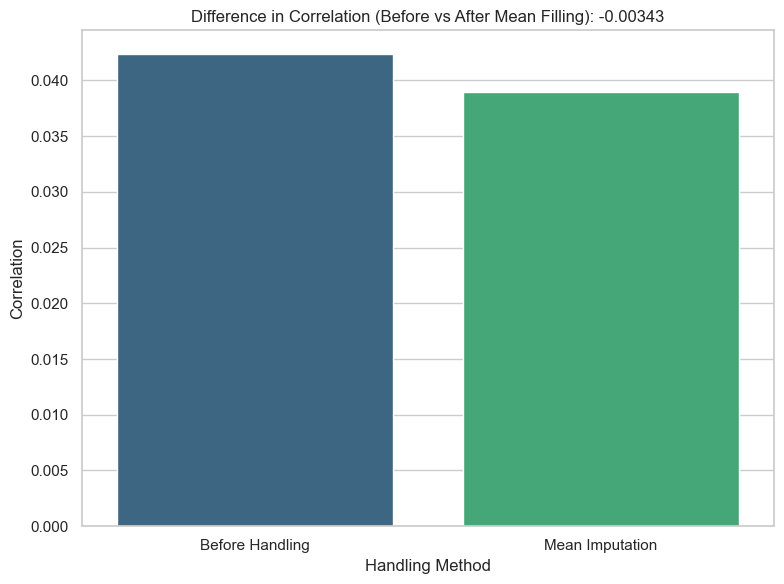

In [44]:
# Create a new DataFrame with the required rows
correlation_values = {
	"Correlation Type": ["Before Handling", "Mean Imputation"],
	"Correlation": [correlation_before.loc["bmi", "stroke"], correlation_mean.loc["bmi", "stroke"]]
}
difference_df = pd.DataFrame(correlation_values)

# Calculate the difference in correlation
correlation_difference = difference_df.loc[difference_df["Correlation Type"] == "Mean Imputation", "Correlation"].values[0] - \
						 difference_df.loc[difference_df["Correlation Type"] == "Before Handling", "Correlation"].values[0]

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")
plt.title(f"Difference in Correlation (Before vs After Mean Filling): {correlation_difference:.5f}")
plt.ylabel("Correlation")
plt.xlabel("Handling Method")
plt.tight_layout()
plt.show()

-- median filling--

In [45]:
# Create a copy of the DataFrame
df_median_bmi = df.copy()

# Replacing missing values in the 'bmi' column with the median
df_median_bmi['bmi'] = df_median_bmi['bmi'].fillna(df_median_bmi['bmi'].median())

# Print the median BMI after filling missing values
print("Median BMI after dropping null values:", df_median_bmi['bmi'].median())


Median BMI after dropping null values: 28.1


In [46]:
correlation_median = df_median_bmi[['bmi', 'stroke']].corr()
print(" Correlation (bmi vs stroke) after median fill:\n", correlation_median)


 Correlation (bmi vs stroke) after median fill:
             bmi   stroke
bmi     1.00000  0.03611
stroke  0.03611  1.00000


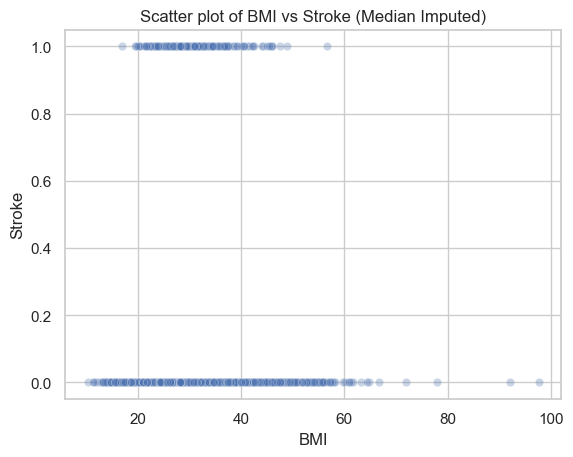

In [47]:
sns.scatterplot(data=df_median_bmi, x='bmi', y='stroke', alpha=0.3)
plt.title('Scatter plot of BMI vs Stroke (Median Imputed)')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.show()

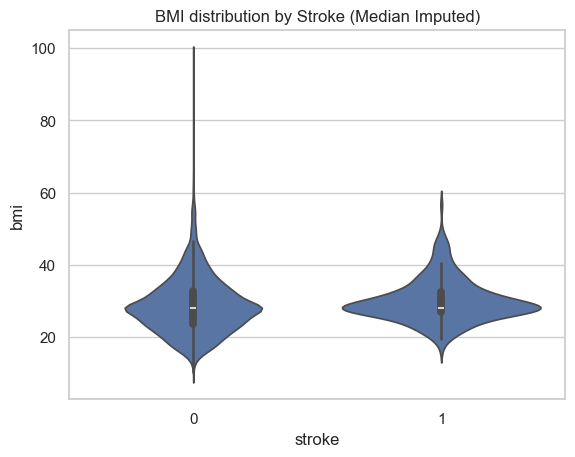

In [48]:

# Plot the violin plot
sns.violinplot(data=df_median_bmi, x='stroke', y='bmi')
plt.title('BMI distribution by Stroke (Median Imputed)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3524\2140723911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_median.index, y=correlation_median['stroke'].values, palette='coolwarm')


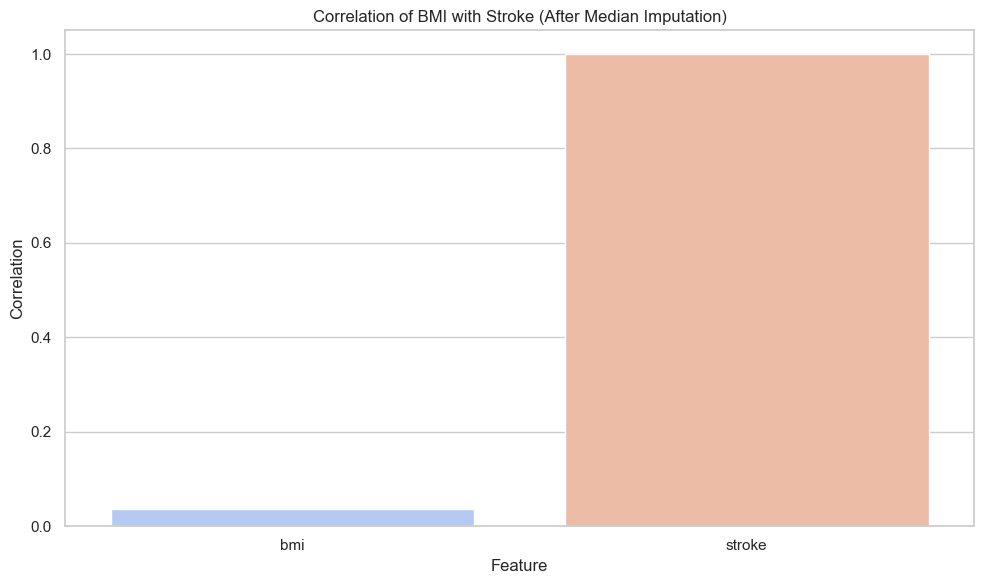

In [49]:
# Plot the correlation as a bar chart after mean 
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_median.index, y=correlation_median['stroke'].values, palette='coolwarm')
plt.title('Correlation of BMI with Stroke (After Median Imputation)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3524\3086321986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")


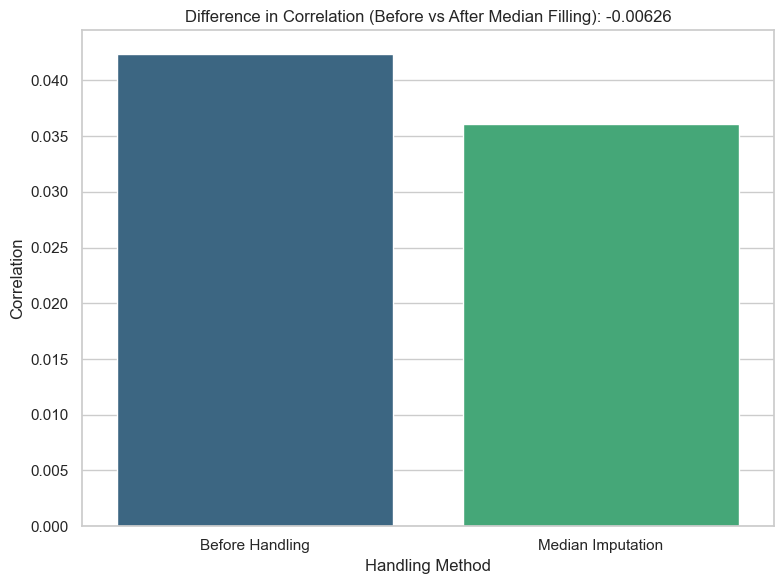

In [50]:
# Create a new DataFrame with the required rows
correlation_values = {
	"Correlation Type": ["Before Handling", "Median Imputation"],
	"Correlation": [correlation_before.loc["bmi", "stroke"], correlation_median.loc["bmi", "stroke"]]
}
difference_df = pd.DataFrame(correlation_values)

# Calculate the difference in correlation
correlation_difference = difference_df.loc[difference_df["Correlation Type"] == "Median Imputation", "Correlation"].values[0] - \
						 difference_df.loc[difference_df["Correlation Type"] == "Before Handling", "Correlation"].values[0]

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")
plt.title(f"Difference in Correlation (Before vs After Median Filling): {correlation_difference:.5f}")
plt.ylabel("Correlation")
plt.xlabel("Handling Method")
plt.tight_layout()
plt.show()

In [51]:
print("Mean BMI:", df['bmi'].mean())
print("Median BMI:", df['bmi'].median())
#compare mean and median to understand why correlation is very close  

Mean BMI: 28.893236911794666
Median BMI: 28.1


now checking smoking

In [52]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

mean and median replacement gave very close values
(both worse than before handling)

--dropping rows with missing bmis--

In [53]:
# Drop rows where 'bmi' is missing or 'smoking_status' is 'Unknown'
df_dropna_bmi= df.copy()

# Replace missing values in 'bmi' with the mean
df_dropna_bmi['bmi'] = df_dropna_bmi['bmi'].fillna(df_dropna_bmi['bmi'].mean())

# Remove rows where 'smoking_status' is 'Unknown'
df_dropna_bmi = df_dropna_bmi.loc[df_dropna_bmi['smoking_status'] != 'Unknown']

# Display the cleaned DataFrame
df_dropna_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3566 entries, 0 to 5108
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 3566 non-null   int64   
 1   gender             3566 non-null   object  
 2   age                3566 non-null   float64 
 3   hypertension       3566 non-null   int64   
 4   heart_disease      3566 non-null   int64   
 5   ever_married       3566 non-null   object  
 6   work_type          3566 non-null   object  
 7   Residence_type     3566 non-null   object  
 8   avg_glucose_level  3566 non-null   float64 
 9   bmi                3566 non-null   float64 
 10  smoking_status     3566 non-null   object  
 11  stroke             3566 non-null   int64   
 12  age_group          3566 non-null   category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 365.9+ KB


In [54]:
df_dropna_bmi = df.copy()
df_dropna_bmi = df_dropna_bmi.dropna(subset=['bmi'])


In [55]:
#confirming
print("Missing BMI values:", df_dropna_bmi['bmi'].isnull().sum())


Missing BMI values: 0


In [56]:
# Check for "Unknown" values in the smoking_status column
unknown_count = df_dropna_bmi['smoking_status'].str.contains('Unknown').sum()
print(f"Number of 'Unknown' smoking_status values: {unknown_count}")

Number of 'Unknown' smoking_status values: 1483


In [57]:
correlation_dropna = df_dropna_bmi[['bmi', 'stroke']].corr()
print(" Correlation (bmi vs stroke) after replacing with mean:\n", correlation_dropna)


 Correlation (bmi vs stroke) after replacing with mean:
              bmi    stroke
bmi     1.000000  0.042374
stroke  0.042374  1.000000


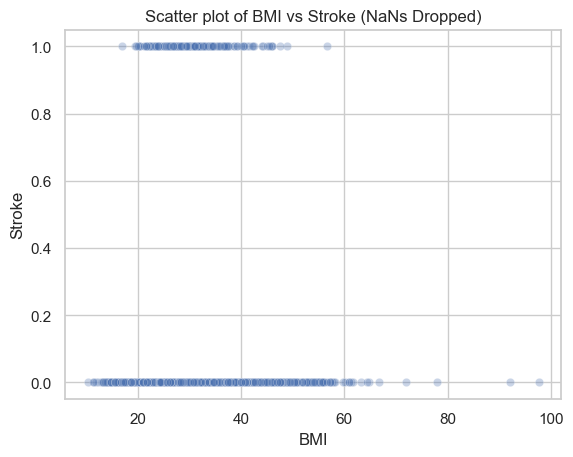

In [58]:
sns.scatterplot(data=df_dropna_bmi, x='bmi', y='stroke', alpha=0.3)
plt.title('Scatter plot of BMI vs Stroke (NaNs Dropped)')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.show()


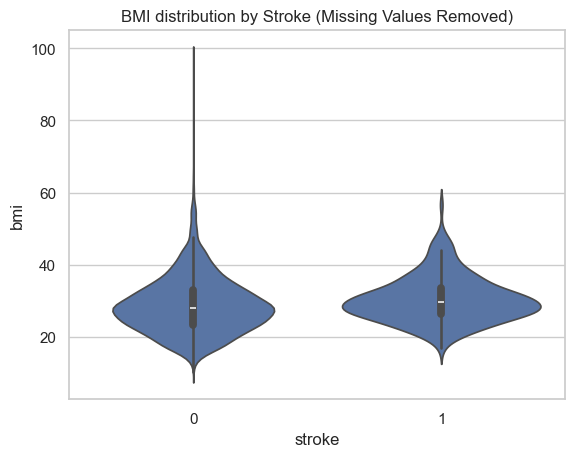

In [59]:


# Plot the violin plot
sns.violinplot(data=df_dropna_bmi, x='stroke', y='bmi')
plt.title('BMI distribution by Stroke (Missing Values Removed)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3524\1917146168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_dropna.index, y=correlation_dropna['stroke'].values, palette='coolwarm')


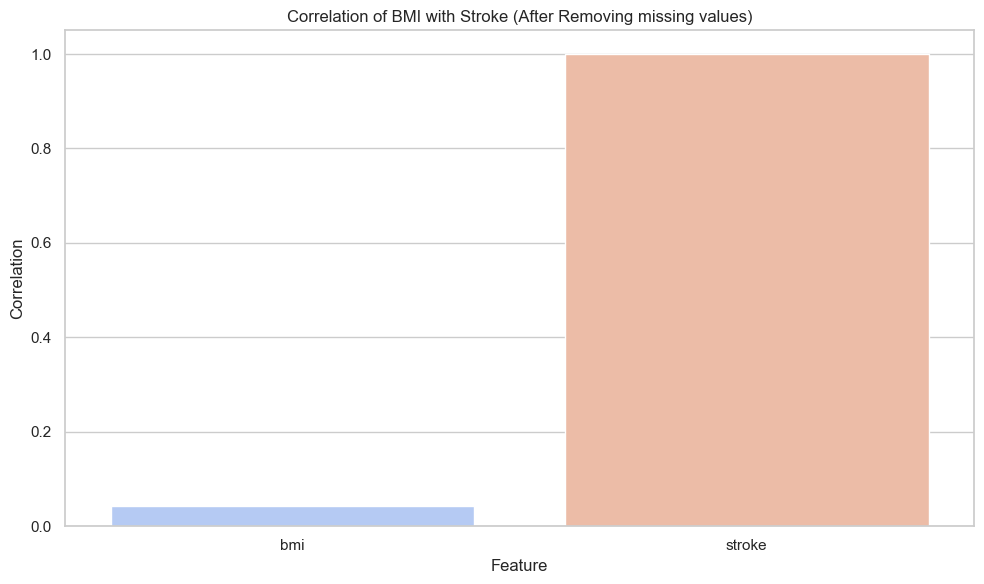

In [60]:
# Plot the correlation as a bar chart after mean 
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_dropna.index, y=correlation_dropna['stroke'].values, palette='coolwarm')
plt.title('Correlation of BMI with Stroke (After Removing missing values)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3524\952762596.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")


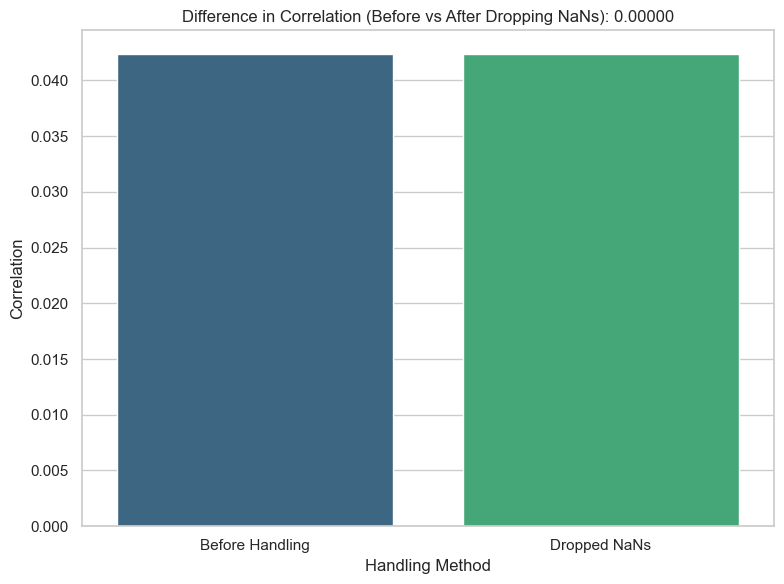

In [61]:
# Ensure the correlation values for "Dropped NaNs" are available
correlation_values = {
	"Correlation Type": ["Before Handling", "Dropped NaNs"],
	"Correlation": [correlation_before.loc["bmi", "stroke"], correlation_dropna.loc["bmi", "stroke"]]
}

# Create a DataFrame for visualization
difference_df = pd.DataFrame(correlation_values)

# Calculate the difference in correlation
correlation_difference = difference_df.loc[difference_df["Correlation Type"] == "Dropped NaNs", "Correlation"].values[0] - \
						 difference_df.loc[difference_df["Correlation Type"] == "Before Handling", "Correlation"].values[0]

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x="Correlation Type", y="Correlation", data=difference_df, palette="viridis")
plt.title(f"Difference in Correlation (Before vs After Dropping NaNs): {correlation_difference:.5f}")
plt.ylabel("Correlation")
plt.xlabel("Handling Method")
plt.tight_layout()
plt.show()

Now we compare between the 3 methods and before handling

C:\Users\User\AppData\Local\Temp\ipykernel_3524\3148006560.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df.index, y=correlation_df['Correlation'], palette='viridis')


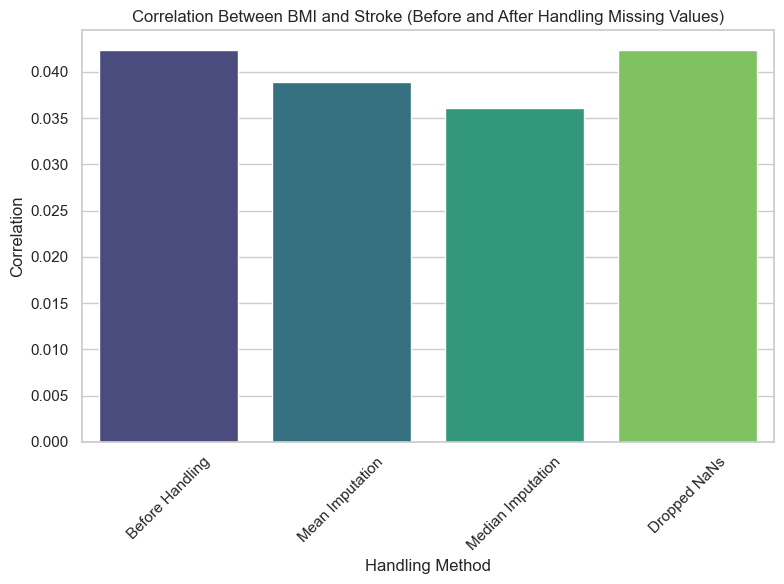

In [62]:


# Prepare data for plotting
correlation_values = {
    "Before Handling": correlation_before.loc['bmi', 'stroke'],
    "Mean Imputation": correlation_mean.loc['bmi', 'stroke'],
    "Median Imputation": correlation_median.loc['bmi', 'stroke'],
    "Dropped NaNs": correlation_dropna.loc['bmi', 'stroke']
}

# Create a DataFrame for visualization
correlation_df = pd.DataFrame.from_dict(correlation_values, orient='index', columns=['Correlation'])

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_df.index, y=correlation_df['Correlation'], palette='viridis')
plt.title('Correlation Between BMI and Stroke (Before and After Handling Missing Values)')
plt.ylabel('Correlation')
plt.xlabel('Handling Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3524\1438389397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


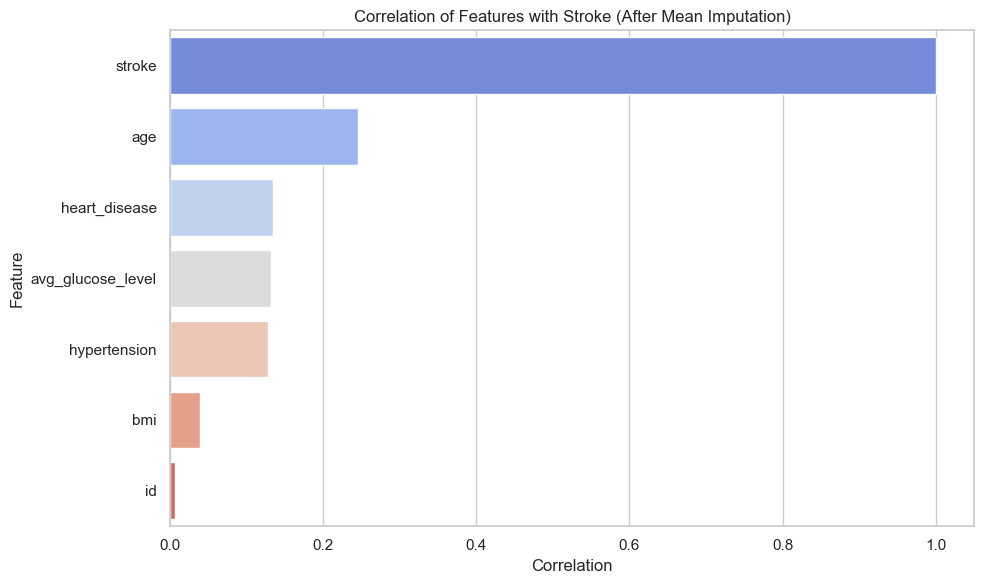

In [63]:
#checking to see if other values are affected
# Calculate correlation of features with stroke for df_median_bmi

correlation_with_stroke_mean = df_mean_bmi.corr(numeric_only=True)['stroke'].sort_values(ascending=False)

# Plot the correlation as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_stroke_mean.values,
    y=correlation_with_stroke_mean.index,
    palette='coolwarm'
)
plt.title('Correlation of Features with Stroke (After Mean Imputation)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3524\656993731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


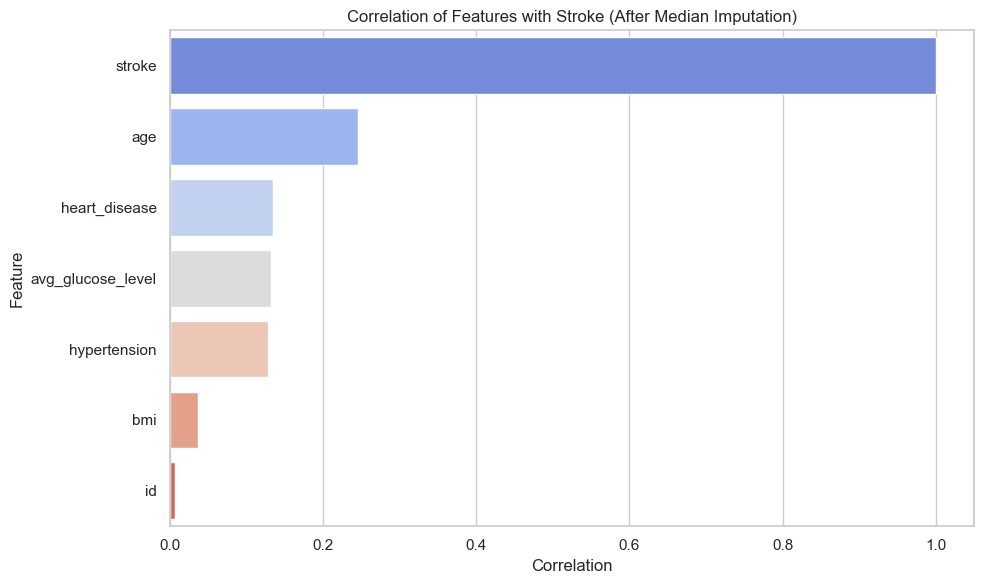

In [64]:
#checking to see if other values are affected
# Calculate correlation of features with stroke for df_median_bmi

correlation_with_stroke_median = df_median_bmi.corr(numeric_only=True)['stroke'].sort_values(ascending=False)

# Plot the correlation as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_stroke_median.values,
    y=correlation_with_stroke_median.index,
    palette='coolwarm'
)
plt.title('Correlation of Features with Stroke (After Median Imputation)')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [65]:
#correlation_mean_handling = df_mean_bmi.corr(numeric_only=True)['stroke'].sort_values(ascending=False)
#print("Correlation between all columns and stroke (Mean Handling):\n", correlation_mean_handling)

C:\Users\User\AppData\Local\Temp\ipykernel_3524\3171997126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


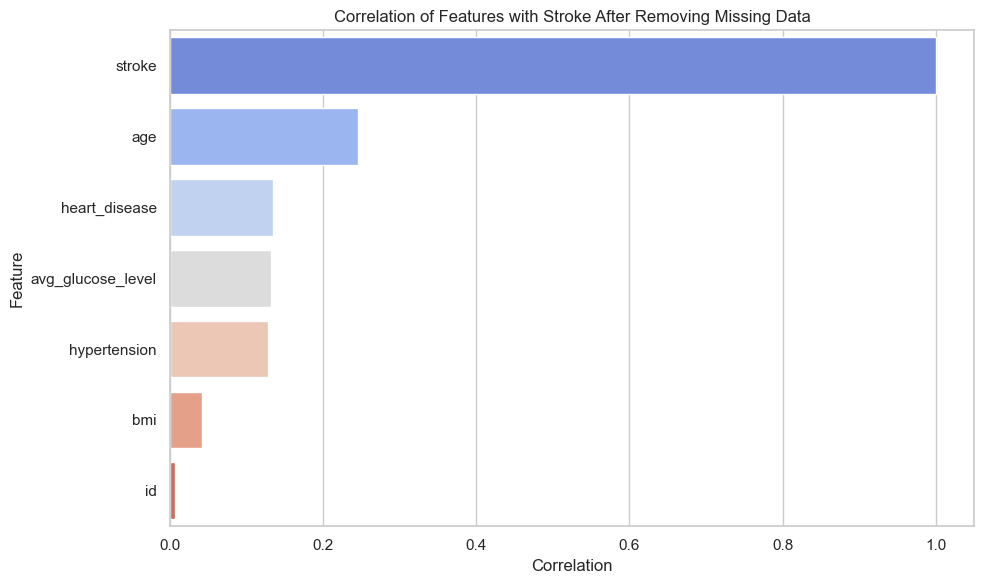

In [66]:
##checking to see if other values are affected

# Plot the correlation values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_stroke.values,
    y=correlation_with_stroke.index,
    palette='coolwarm'
)
plt.title('Correlation of Features with Stroke After Removing Missing Data')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Decision:replacing with mean (bmi) and removing smoking status unknown

In [67]:
df_droppedid = df.drop(columns=['id'])
# id is not useful for prediction
df_clean = df_droppedid.dropna(subset=['bmi']).copy()
# didn't overwrite the original df (may need it later)

# Drop rows where smoking_status is 'Unknown'
df_clean = df_clean[df_clean['smoking_status'] != 'Unknown']


In [68]:
df_clean.head

<bound method NDFrame.head of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5100    Male  82.0             1              0          Yes  Self-employed   
5102  Female  57.0             0              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   

     Residence_type  

In [69]:
print("Missing values remaining:\n", df_clean.isnull().sum())


Missing values remaining:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64


# outliers

## Age

In [70]:
sns.histplot(df_clean['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('../visuals/age_distribution.png')
plt.close()

-In the box plot we can observe that there is a 2 points when stroke=1 under 20 years, Strokes in young people (under 20) are rare but possible—especially in people with genetic disorders, trauma, or congenital heart disease.
So medically, it’s not an error(not outliers).<br>
-stroke in infants is extremely rare, almost always a data error so age under 1 year will be removed
| ![distribution](../visuals/age_distribution.png) | ![box](../visuals/boxplot_age_by_stroke.png)
|:---------------------------------------------------------------:|:------------------------------------------:|


Text(0, 0.5, 'Count')

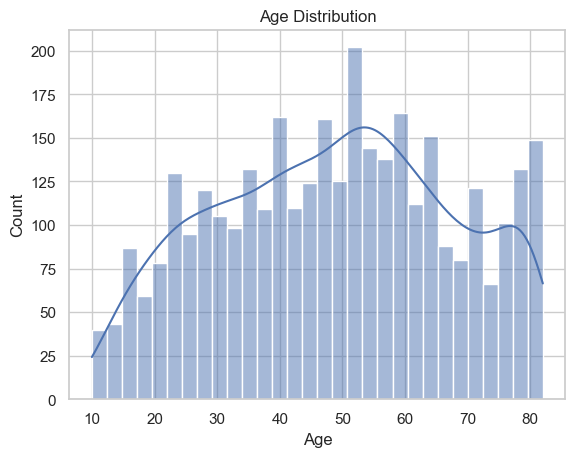

In [71]:
df_clean = df_clean[df_clean['age'] >= 1]
sns.histplot(df_clean['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')


## Glucose
avg_glucose_level = 271.74 is high, but not invalid.<br>
it should not be changed as high glucose is medically meaningful for stroke risk.

Text(0, 0.5, 'Count')

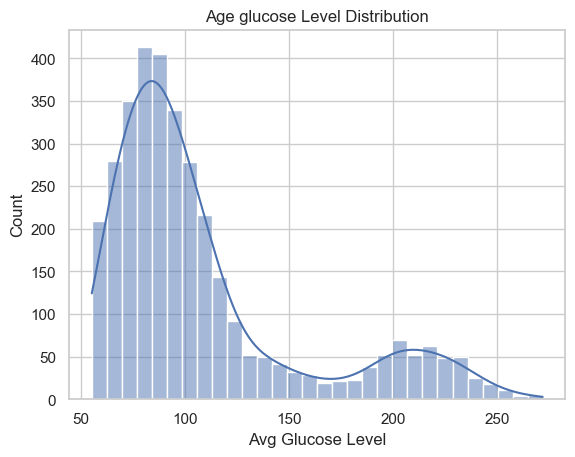

In [72]:
sns.histplot(df_clean['avg_glucose_level'], kde=True, bins=30)
plt.title('Age glucose Level Distribution')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Count')

## BMI

To prevent extremely high BMI values from skewing the model, we capped all BMI values **above 60**.Values beyond this threshold are often due to data entry errors or are medically extreme. This ensures our model focuses on realistic and clinically meaningful data.

Text(0, 0.5, 'Count')

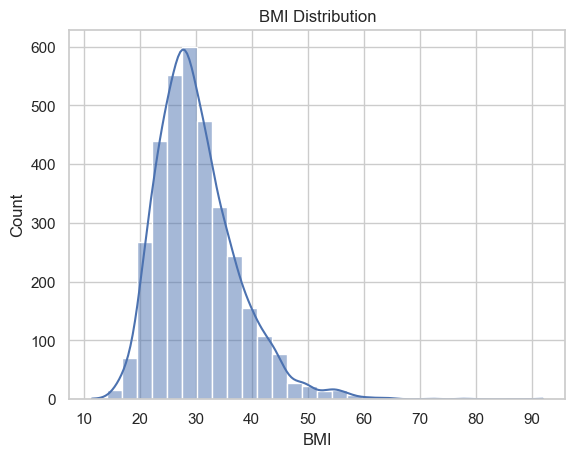

In [73]:
df_clean = df_clean[df_clean['bmi'] >= 1]
sns.histplot(df_clean['bmi'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')


In [74]:
df_clean['bmi'] = df_clean['bmi'].apply(lambda x: 60 if x > 60 else x)


Text(0, 0.5, 'Count')

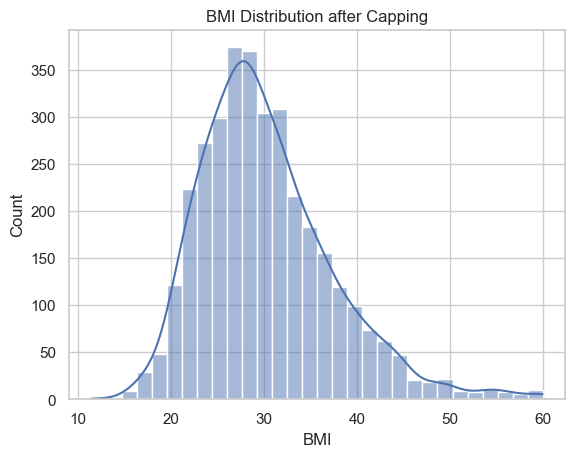

In [75]:
df_clean = df_clean[df_clean['bmi'] >= 1]
sns.histplot(df_clean['bmi'], kde=True, bins=30)
plt.title('BMI Distribution after Capping')
plt.xlabel('BMI')
plt.ylabel('Count')


In [76]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
age_group              0
dtype: int64

<h1>Deal with categorical variables</h1>

In [77]:

df_clean= df_clean.drop(columns=['age_group'], errors='ignore')
df_clean.iloc[0]

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object

<h2> multicollinearity (one column is always predictable from the others), which breaks some models.</h2>

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


df_final = df_clean.copy()


df_final = df_final.drop(columns=['age_group'], errors='ignore')

# 1. Separate features (X) and target (y)
X_final = df_final.drop(columns=['stroke'])
y_final = df_final['stroke']

# 2. Group rare categorical values
X_final['work_type'] = X_final['work_type'].replace(['Never_worked', 'children'], 'Non-working')

# 3. One-hot encode categorical variables (drop_first=True avoids multicollinearity)
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_encoded = pd.get_dummies(X_final, columns=categorical_cols, drop_first=True)

# 4. Scale numerical features
#numerical_cols = ['age', 'avg_glucose_level', 'bmi']
#X_encoded[numerical_cols] = StandardScaler().fit_transform(X_encoded[numerical_cols])

# 5. Keep binary variables unchanged
binary_cols = ['hypertension', 'heart_disease']
X_encoded[binary_cols] = X_final[binary_cols]

# Final check
print(X_encoded.iloc[0])


age                              67.0
hypertension                        0
heart_disease                       1
avg_glucose_level              228.69
bmi                              36.6
gender_Male                      True
gender_Other                    False
ever_married_Yes                 True
work_type_Non-working           False
work_type_Private                True
work_type_Self-employed         False
Residence_type_Urban             True
smoking_status_never smoked     False
smoking_status_smokes           False
Name: 0, dtype: object


In [79]:

print(X_final.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')


<h1> before one hot encoding  </h1>

In [80]:
print(X_final.iloc[0])

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
Name: 0, dtype: object


<h1> After one Hot encoding</h1>

In [81]:
print(X_encoded.iloc[0])

age                              67.0
hypertension                        0
heart_disease                       1
avg_glucose_level              228.69
bmi                              36.6
gender_Male                      True
gender_Other                    False
ever_married_Yes                 True
work_type_Non-working           False
work_type_Private                True
work_type_Self-employed         False
Residence_type_Urban             True
smoking_status_never smoked     False
smoking_status_smokes           False
Name: 0, dtype: object


<h1> Manually splitting the data  </h1>

In [82]:
from imblearn.over_sampling import SMOTE
# First split: training+validation and test
X_temp, X_test, y_temp, y_test = train_test_split(X_encoded, y_final, test_size=0.2, random_state=42, stratify=y_final)

# Second split: training and validation (from temp)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Print sizes to confirm
print("Training set:", X_train.shape,"60%")
print("Validation set:", X_val.shape,"20%")
print("Testing set:", X_test.shape,"20%")
print("Training set:", X_train_resampled.shape)

Training set: (2055, 14) 60%
Validation set: (685, 14) 20%
Testing set: (686, 14) 20%
Training set: (3894, 14)


<h1> ensure the split is done successfully</h1>

In [83]:
enc_Shape = X_encoded.shape
split_shape = (X_train+X_val+X_test).shape
if (enc_Shape == split_shape):
    print("splitted successfully with the original data :" , (X_train+X_val+X_test).shape ,"splitted data ", X_encoded.shape ) 
else:
    print("the split is not successfully")

splitted successfully with the original data : (3426, 14) splitted data  (3426, 14)


In [84]:
# Scale only numerical columns
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()

# Fit only on training data, then transform others
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_train_resampled[numerical_cols] = scaler.transform(X_train_resampled[numerical_cols])
X_val[numerical_cols]   = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols]  = scaler.transform(X_test[numerical_cols])


In [85]:
# Count occurrences of each class in the resampled labels
unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)

# Print the counts of each class
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: {count} samples")

Class 0: 1947 samples
Class 1: 1947 samples


<h1 style="font-size:40px">T-SNE in 2D with different Hyperparameters</h1>


In [86]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Added numpy import
from sklearn.metrics import pairwise_distances

# Define just the two desired configurations
configs = [
    {"perplexity": 5, "n_iter": 1000},
    {"perplexity": 30, "n_iter": 3000},
    {"perplexity": 50, "n_iter": 5000}
]

for config in configs:
    perplexity = config['perplexity']
    n_iter = config['n_iter']
    print(f"\nRunning t-SNE with perplexity={perplexity}, n_iter={n_iter}")

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=n_iter)
    tsne_results = tsne.fit_transform(X_encoded)

    # Create DataFrame for t-SNE output
    tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE 1', 't-SNE 2'])
    tsne_df['Stroke'] = y_final.map({0: 'No Stroke', 1: 'Stroke'})

    # Compute pairwise distances for Shepherd diagram
    high_dists = pairwise_distances(X_encoded)
    low_dists = pairwise_distances(tsne_results)

    # Extract upper triangle (avoid duplicates and zeros)
    i, j = np.triu_indices_from(high_dists, k=1)
    high_vals = high_dists[i, j]
    low_vals = low_dists[i, j]

    # Plot Shepherd Diagram
    plt.figure(figsize=(6, 6))
    plt.scatter(high_vals, low_vals, s=2, alpha=0.3)
    plt.plot([0, max(high_vals)], [0, max(low_vals)], color='red', linestyle='--', label='Ideal (y = x)')
    plt.title(f'Shepherd Diagram (Perplexity={perplexity}, Iter={n_iter})')
    plt.xlabel('High-dimensional Distance')
    plt.ylabel('t-SNE 2D Distance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'shepherd_diagram_p{perplexity}_iter{n_iter}.png', dpi=300)
    plt.show()

    # Create 2x2 subplot visualization
    plt.figure(figsize=(12, 10))
    plt.suptitle(f't-SNE Visualization (Perplexity={perplexity}, Iter={n_iter})', fontsize=16, y=1.02)

    # Plot 1: Stroke outcome
    plt.subplot(2, 2, 1)
    plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], c=y_final, cmap=plt.cm.get_cmap('coolwarm', 2), alpha=0.7)
    plt.colorbar(label='Stroke')
    plt.title('t-SNE: Patient Distribution by Stroke Outcome')

    # Plot 2: Age
    plt.subplot(2, 2, 2)
    scatter = plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], c=df_final['age'], cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Age')
    plt.title('t-SNE: Patient Distribution by Age')

    # Plot 3: Glucose Level
    plt.subplot(2, 2, 3)
    scatter = plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], c=df_final['avg_glucose_level'], cmap='plasma', alpha=0.7)
    plt.colorbar(scatter, label='Glucose Level')
    plt.title('t-SNE: Patient Distribution by Glucose Level')

    # Plot 4: BMI
    plt.subplot(2, 2, 4)
    scatter = plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], c=df_final['bmi'], cmap='magma', alpha=0.7)
    plt.colorbar(scatter, label='BMI')
    plt.title('t-SNE: Patient Distribution by BMI')

    plt.tight_layout()
    plt.savefig(f'../visuals/stroke_tsne_p{perplexity}_iter{n_iter}.png', dpi=300)
    plt.show()

    # Gender-based visualization
    plt.figure(figsize=(10, 8))
    gender_encoded = df_final['gender'].map(lambda x: {'Female': 0, 'Male': 1, 'Other': 2}.get(x, 0) if isinstance(x, str) else x)
    plt.scatter(tsne_df['t-SNE 1'], tsne_df['t-SNE 2'], c=gender_encoded, cmap=plt.cm.get_cmap('tab10', 3), alpha=0.7)
    plt.colorbar(label='Gender (0: Female, 1: Male, 2: Other)')
    plt.title(f't-SNE: Patient Distribution by Gender (Perplexity={perplexity}, Iter={n_iter})')
    plt.savefig(f'../visuals/stroke_tsne_gender_p{perplexity}_iter{n_iter}.png', dpi=300)
    plt.show()

    # Add an enhanced Shepherd diagram with regression line
    plt.figure(figsize=(8, 8))
    
    # Create scatter plot with more visible points
    plt.scatter(high_vals, low_vals, s=3, alpha=0.4, color='blue')
    
    # Add line of best fit
    z = np.polyfit(high_vals, low_vals, 1)
    p = np.poly1d(z)
    plt.plot(high_vals, p(high_vals), color='green', linestyle='-', linewidth=2, 
             label=f'Regression (y={z[0]:.4f}x+{z[1]:.4f})')
    
    # Add ideal line
    plt.plot([0, max(high_vals)], [0, max(high_vals)], color='red', linestyle='--', 
             linewidth=2, label='Ideal (y=x)')
    
    # Add labels and title
    plt.title(f'Enhanced Shepherd Diagram\nPerplexity={perplexity}, Iterations={n_iter}', fontsize=14)
    plt.xlabel('High-dimensional Distance', fontsize=12)
    plt.ylabel('t-SNE 2D Distance', fontsize=12)
    
    # Add KL divergence value if available
    kl_divergence = tsne.kl_divergence_ if hasattr(tsne, 'kl_divergence_') else None
    if kl_divergence is not None:
        plt.annotate(f'KL Divergence: {kl_divergence:.4f}', 
                     xy=(0.05, 0.95), xycoords='axes fraction', 
                     fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    # Calculate and display correlation
    corr = np.corrcoef(high_vals, low_vals)[0, 1]
    plt.annotate(f'Correlation: {corr:.4f}', 
                 xy=(0.05, 0.90), xycoords='axes fraction', 
                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'enhanced_shepherd_p{perplexity}_iter{n_iter}.png', dpi=300)
    plt.show()

    # Summary statistics
    print(f"Summary statistics (Perplexity={perplexity}, Iter={n_iter}):")
    print(tsne_df.groupby('Stroke')[['t-SNE 1', 't-SNE 2']].describe())

    # Save CSV
    tsne_results_with_features = pd.concat([df_final, tsne_df[['t-SNE 1', 't-SNE 2']]], axis=1)
    tsne_results_with_features.to_csv(f'../Data/stroke_tsne_results_p{perplexity}_iter{n_iter}.csv', index=False)


Running t-SNE with perplexity=5, n_iter=1000


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KeyboardInterrupt: 

<h1 style="font-size:40px">T-SNE to display  the stroke patients clerly</h1>


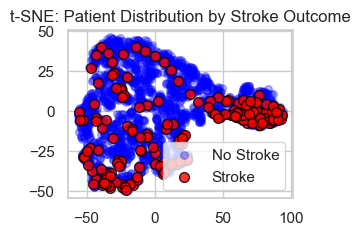

In [ ]:
# Plot 1: Improved t-SNE visualization by stroke outcome
plt.subplot(2, 2, 1)

# First plot the majority class (No Stroke)
no_stroke = tsne_df[tsne_df['Stroke'] == 'No Stroke']
plt.scatter(
    x=no_stroke['t-SNE 1'], 
    y=no_stroke['t-SNE 2'],
    c='blue',
    alpha=0.3,  # Lower alpha for background points
    label='No Stroke',
    s=30  # Smaller point size
)

# Then plot the minority class (Stroke) on top with higher visibility
stroke = tsne_df[tsne_df['Stroke'] == 'Stroke']
plt.scatter(
    x=stroke['t-SNE 1'], 
    y=stroke['t-SNE 2'],
    c='red',
    alpha=0.8,  # Higher alpha for better visibility
    label='Stroke',
    s=50,  # Larger point size
    edgecolor='black'  # Add black edge to make them stand out more
)

plt.title('t-SNE: Patient Distribution by Stroke Outcome')
plt.legend()

<h1 style="font-size:40px">T-SNE with 3D components</h1>


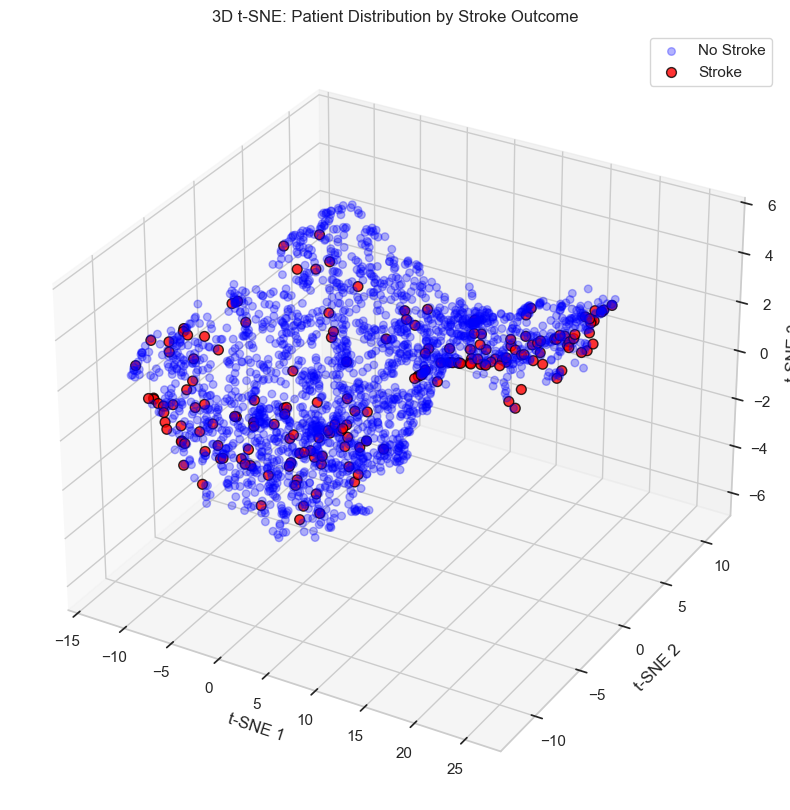

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE with 3 components instead of 2
tsne_3d = TSNE(n_components=3, random_state=42, perplexity=50, n_iter=5000)
tsne_results_3d = tsne_3d.fit_transform(X_encoded)

# Create a DataFrame for the 3D t-SNE results
tsne_df_3d = pd.DataFrame(data=tsne_results_3d, columns=['t-SNE 1', 't-SNE 2', 't-SNE 3'])
tsne_df_3d['Stroke'] = y_final.map({0: 'No Stroke', 1: 'Stroke'})

# Create 3D visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot No Stroke cases
no_stroke = tsne_df_3d[tsne_df_3d['Stroke'] == 'No Stroke']
ax.scatter(
    no_stroke['t-SNE 1'],
    no_stroke['t-SNE 2'],
    no_stroke['t-SNE 3'],
    c='blue',
    alpha=0.3,
    label='No Stroke',
    s=30
)

# Plot Stroke cases with higher visibility
stroke = tsne_df_3d[tsne_df_3d['Stroke'] == 'Stroke']
ax.scatter(
    stroke['t-SNE 1'],
    stroke['t-SNE 2'],
    stroke['t-SNE 3'],
    c='red',
    alpha=0.8,
    label='Stroke',
    s=50,
    edgecolor='black'
)

# Add labels and legend
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('3D t-SNE: Patient Distribution by Stroke Outcome')
plt.legend()

plt.savefig('../visuals/stroke_tsne_3d.png', dpi=300)
plt.show()

 <h1 style="font-size:40px">T-SNE 3D with other features</h1>


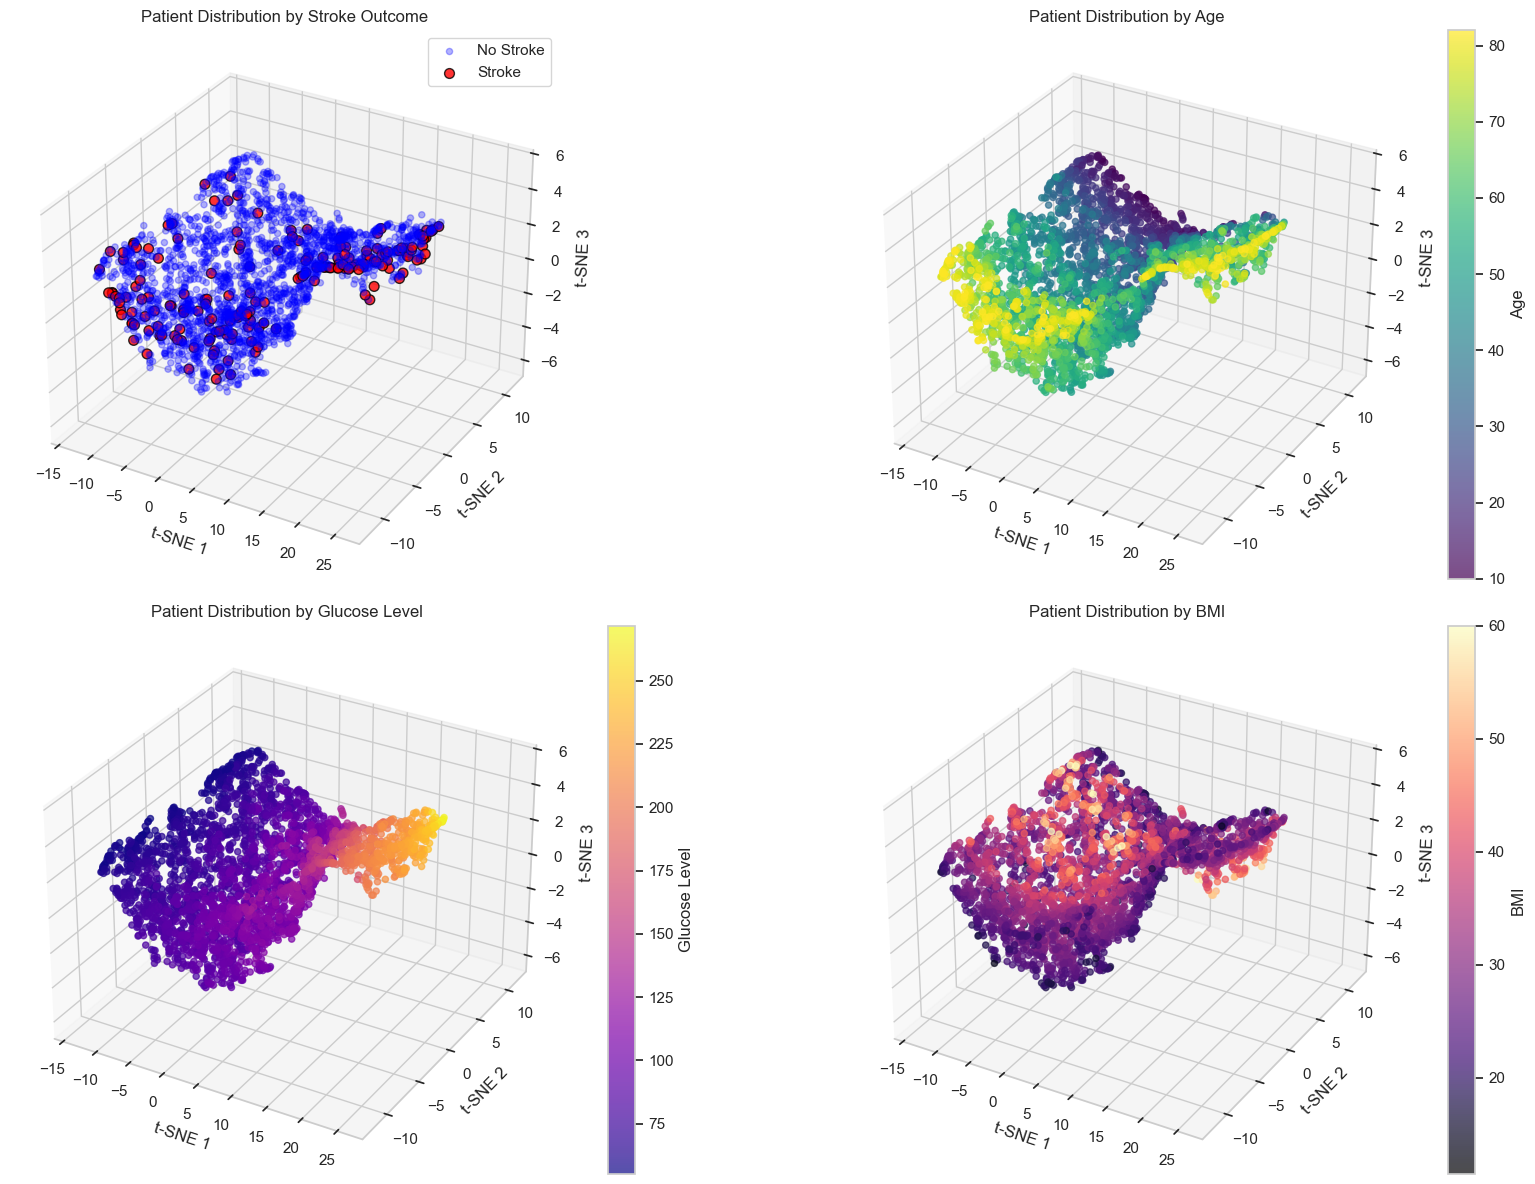

In [ ]:
# Create multiple 3D visualizations
fig = plt.figure(figsize=(18, 12))

# Plot 1: Stroke outcome
ax1 = fig.add_subplot(221, projection='3d')
no_stroke = tsne_df_3d[tsne_df_3d['Stroke'] == 'No Stroke']
stroke = tsne_df_3d[tsne_df_3d['Stroke'] == 'Stroke']

ax1.scatter(no_stroke['t-SNE 1'], no_stroke['t-SNE 2'], no_stroke['t-SNE 3'], c='blue', alpha=0.3, label='No Stroke')
ax1.scatter(stroke['t-SNE 1'], stroke['t-SNE 2'], stroke['t-SNE 3'], c='red', alpha=0.8, label='Stroke', s=50, edgecolor='black')
ax1.set_title('Patient Distribution by Stroke Outcome')
ax1.set_xlabel('t-SNE 1')
ax1.set_ylabel('t-SNE 2')
ax1.set_zlabel('t-SNE 3')
ax1.legend()

# Plot 2: Age
ax2 = fig.add_subplot(222, projection='3d')
scatter = ax2.scatter(
    tsne_df_3d['t-SNE 1'], 
    tsne_df_3d['t-SNE 2'], 
    tsne_df_3d['t-SNE 3'],
    c=df_final['age'],
    cmap='viridis',
    alpha=0.7
)
ax2.set_title('Patient Distribution by Age')
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')
ax2.set_zlabel('t-SNE 3')
fig.colorbar(scatter, ax=ax2, label='Age')

# Plot 3: Glucose level
ax3 = fig.add_subplot(223, projection='3d')
scatter = ax3.scatter(
    tsne_df_3d['t-SNE 1'], 
    tsne_df_3d['t-SNE 2'], 
    tsne_df_3d['t-SNE 3'],
    c=df_final['avg_glucose_level'],
    cmap='plasma',
    alpha=0.7
)
ax3.set_title('Patient Distribution by Glucose Level')
ax3.set_xlabel('t-SNE 1')
ax3.set_ylabel('t-SNE 2')
ax3.set_zlabel('t-SNE 3')
fig.colorbar(scatter, ax=ax3, label='Glucose Level')

# Plot 4: BMI
ax4 = fig.add_subplot(224, projection='3d')
scatter = ax4.scatter(
    tsne_df_3d['t-SNE 1'], 
    tsne_df_3d['t-SNE 2'], 
    tsne_df_3d['t-SNE 3'],
    c=df_final['bmi'],
    cmap='magma',
    alpha=0.7
)
ax4.set_title('Patient Distribution by BMI')
ax4.set_xlabel('t-SNE 1')
ax4.set_ylabel('t-SNE 2')
ax4.set_zlabel('t-SNE 3')
fig.colorbar(scatter, ax=ax4, label='BMI')

plt.tight_layout()
plt.savefig('../visuals/stroke_tsne_3d_multiplot.png', dpi=300)
plt.show()

In [ ]:
print(df.head)

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban   

<h1 style="font-size:40px">T-SNE in 1D</h1>


C:\Users\mazen\AppData\Local\Temp\ipykernel_17856\823247320.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='t-SNE 1', y='Stroke', data=tsne_df_1d, palette={'No Stroke': 'blue', 'Stroke': 'red'},
C:\Users\mazen\AppData\Local\Temp\ipykernel_17856\823247320.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Stroke', y='t-SNE 1', data=tsne_df_1d, palette={'No Stroke': 'blue', 'Stroke': 'red'},


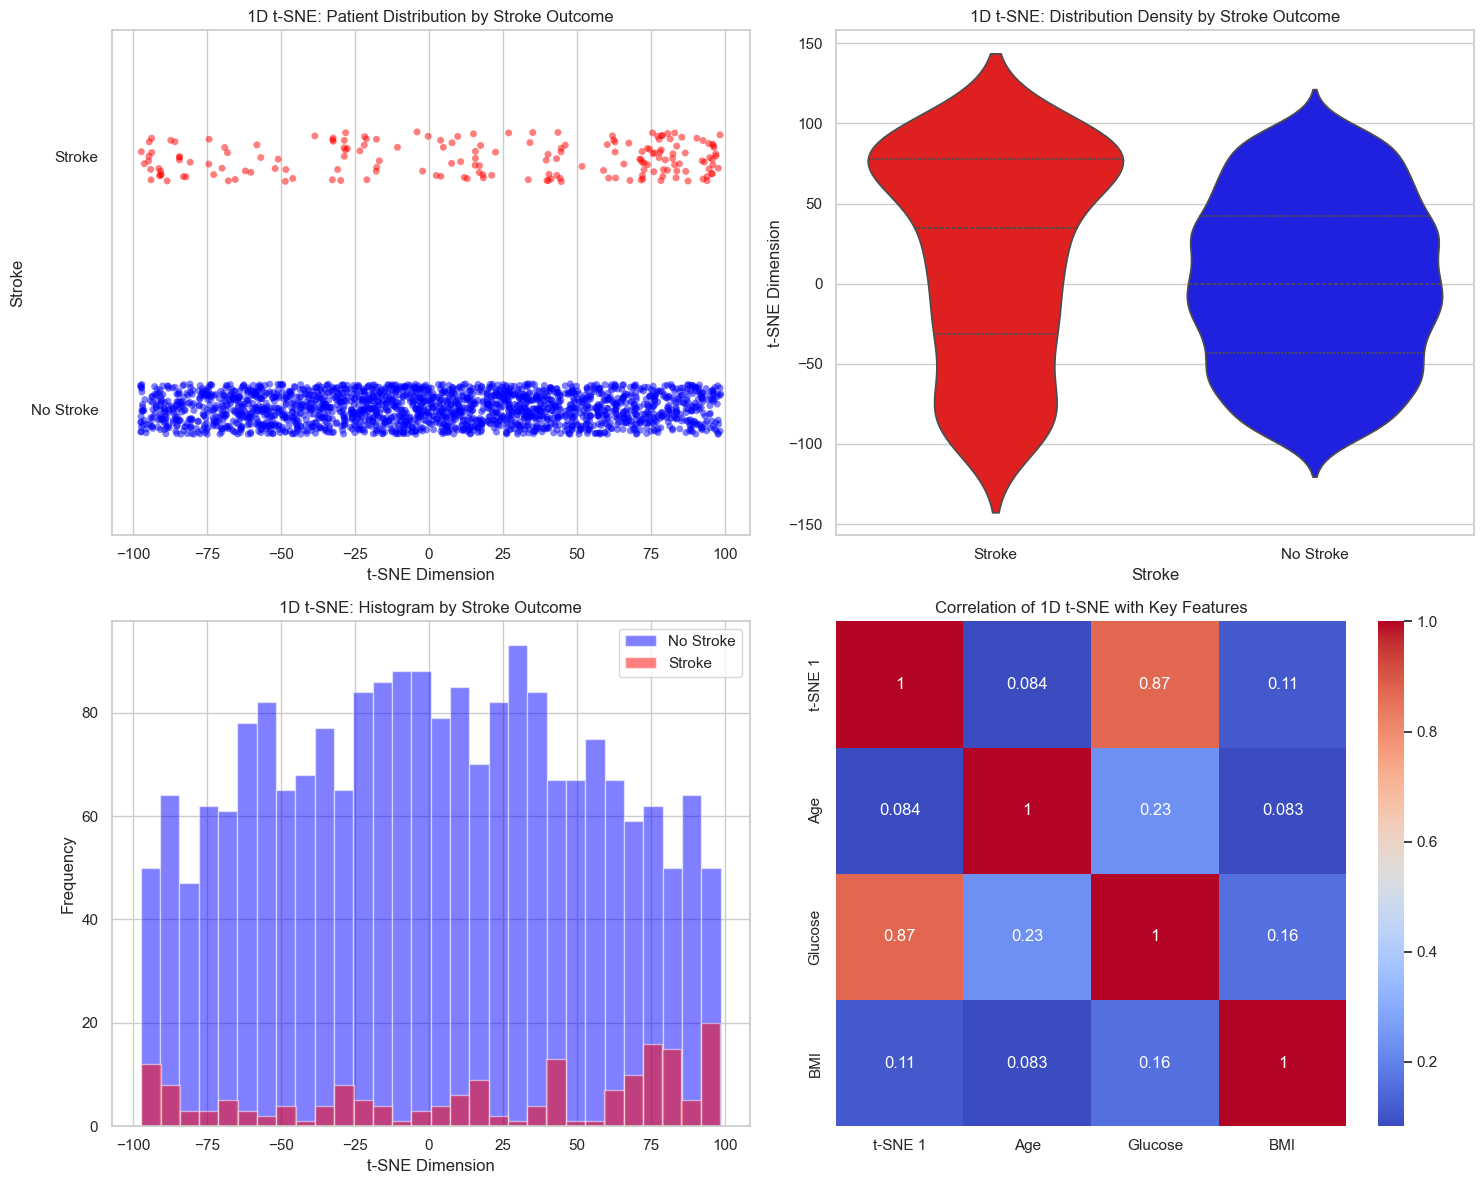

In [ ]:
# Apply t-SNE with 1 component
tsne_1d = TSNE(n_components=1, random_state=42, perplexity=30, n_iter=1000)
tsne_results_1d = tsne_1d.fit_transform(X_encoded)

# Create a DataFrame for the 1D t-SNE results
tsne_df_1d = pd.DataFrame(data=tsne_results_1d, columns=['t-SNE 1'])
tsne_df_1d['Stroke'] = y_final.map({0: 'No Stroke', 1: 'Stroke'})

# Create visualization plots for 1D t-SNE
plt.figure(figsize=(15, 12))

# Plot 1: Distribution by stroke outcome using stripplot
plt.subplot(2, 2, 1)
import seaborn as sns
sns.stripplot(x='t-SNE 1', y='Stroke', data=tsne_df_1d, palette={'No Stroke': 'blue', 'Stroke': 'red'}, 
              alpha=0.5, jitter=True, size=5)
plt.title('1D t-SNE: Patient Distribution by Stroke Outcome')
plt.xlabel('t-SNE Dimension')

# Plot 2: Distribution by stroke outcome using violinplot
plt.subplot(2, 2, 2)
sns.violinplot(x='Stroke', y='t-SNE 1', data=tsne_df_1d, palette={'No Stroke': 'blue', 'Stroke': 'red'}, 
               inner='quartile')
plt.title('1D t-SNE: Distribution Density by Stroke Outcome')
plt.ylabel('t-SNE Dimension')

# Plot 3: Histogram of 1D t-SNE values colored by stroke outcome
plt.subplot(2, 2, 3)
for stroke_status, color in zip(['No Stroke', 'Stroke'], ['blue', 'red']):
    subset = tsne_df_1d[tsne_df_1d['Stroke'] == stroke_status]
    plt.hist(subset['t-SNE 1'], bins=30, alpha=0.5, color=color, label=stroke_status)
plt.title('1D t-SNE: Histogram by Stroke Outcome')
plt.xlabel('t-SNE Dimension')
plt.ylabel('Frequency')
plt.legend()

# Plot 4: Correlation of 1D t-SNE with key features
plt.subplot(2, 2, 4)
# Combine t-SNE results with important features
corr_data = pd.DataFrame({
    't-SNE 1': tsne_results_1d.flatten(),
    'Age': df_final['age'],
    'Glucose': df_final['avg_glucose_level'],
    'BMI': df_final['bmi']
})
correlation = corr_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of 1D t-SNE with Key Features')

plt.tight_layout()
plt.savefig('../visuals/stroke_tsne_1d_visualization.png', dpi=300)
plt.show()

# SVM

In [87]:
from sklearn.metrics import accuracy_score

svm_model = SVC(class_weight='balanced')
svm_model_smote = SVC(class_weight='balanced')
# Train
svm_model.fit(X_train, y_train)
svm_model_smote.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = svm_model.predict(X_test)
y_pred_smote = svm_model_smote.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
accuracy_Svm = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_Svm)
print("AFTER SMOTE --------")
#Evaluate After SMOTE
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
accuracy_Svm_smote = accuracy_score(y_test, y_pred_smote)
print("Accuracy Score:", accuracy_Svm_smote)

Confusion Matrix:
 [[510 140]
 [ 14  22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       650
           1       0.14      0.61      0.22        36

    accuracy                           0.78       686
   macro avg       0.55      0.70      0.55       686
weighted avg       0.93      0.78      0.83       686

Accuracy Score: 0.7755102040816326
AFTER SMOTE --------
Confusion Matrix:
 [[560  90]
 [ 28   8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       650
           1       0.08      0.22      0.12        36

    accuracy                           0.83       686
   macro avg       0.52      0.54      0.51       686
weighted avg       0.91      0.83      0.86       686

Accuracy Score: 0.8279883381924198


## Classification Report Visualization

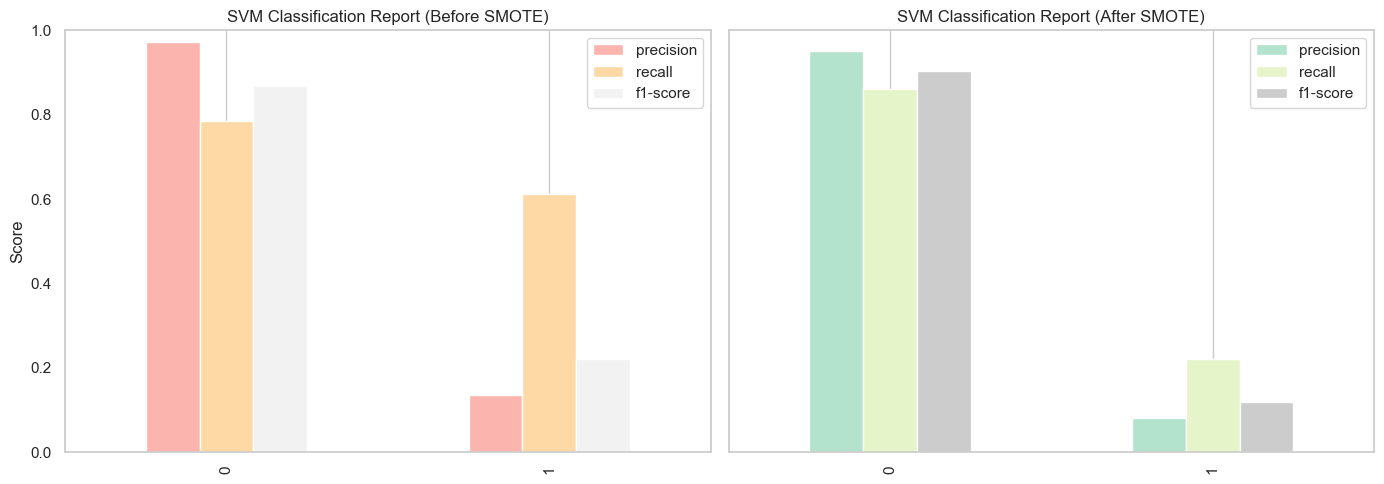

In [91]:
# Create classification report dictionaries
report_before = classification_report(y_test, y_pred, output_dict=True)
report_after = classification_report(y_test, y_pred_smote, output_dict=True)

# Convert to DataFrames
df_before = pd.DataFrame(report_before).transpose().iloc[:2, :3]
df_after = pd.DataFrame(report_after).transpose().iloc[:2, :3]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

df_before.plot(kind='bar', ax=axes[0], colormap='Pastel1', ylim=(0, 1))
axes[0].set_title('SVM Classification Report (Before SMOTE)')
axes[0].set_ylabel('Score')
axes[0].grid(axis='y')

df_after.plot(kind='bar', ax=axes[1], colormap='Pastel2', ylim=(0, 1))
axes[1].set_title('SVM Classification Report (After SMOTE)')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


## Confusion matrix Visualization

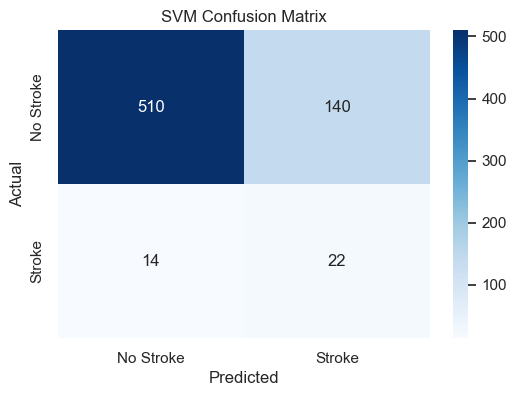

In [89]:
# Confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

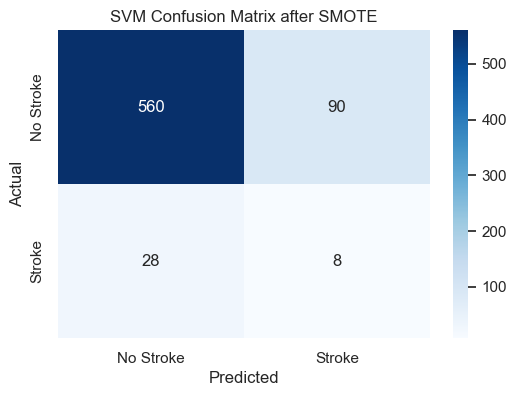

In [90]:
# Confusion matrix values after SMOTE
cm = confusion_matrix(y_test, y_pred_smote)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("SVM Confusion Matrix after SMOTE")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree

In [112]:
# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
dt_model_smote = DecisionTreeClassifier(random_state=42)

# Train on original data
dt_model.fit(X_train, y_train)

# Train on SMOTE-resampled data
dt_model_smote.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_dt = dt_model.predict(X_test)
y_pred_dt_smote = dt_model_smote.predict(X_test)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Score:", accuracy_dt)

print("-------- AFTER SMOTE --------")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_smote))
accuracy_dt_smote = accuracy_score(y_test, y_pred_dt_smote)
print("Accuracy Score:", accuracy_dt_smote)


Confusion Matrix:
 [[608  42]
 [ 32   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       650
           1       0.09      0.11      0.10        36

    accuracy                           0.89       686
   macro avg       0.52      0.52      0.52       686
weighted avg       0.90      0.89      0.90       686

Accuracy Score: 0.892128279883382
-------- AFTER SMOTE --------
Confusion Matrix:
 [[599  51]
 [ 30   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       650
           1       0.11      0.17      0.13        36

    accuracy                           0.88       686
   macro avg       0.53      0.54      0.53       686
weighted avg       0.91      0.88      0.89       686

Accuracy Score: 0.8819241982507289


## classification reports Visualization

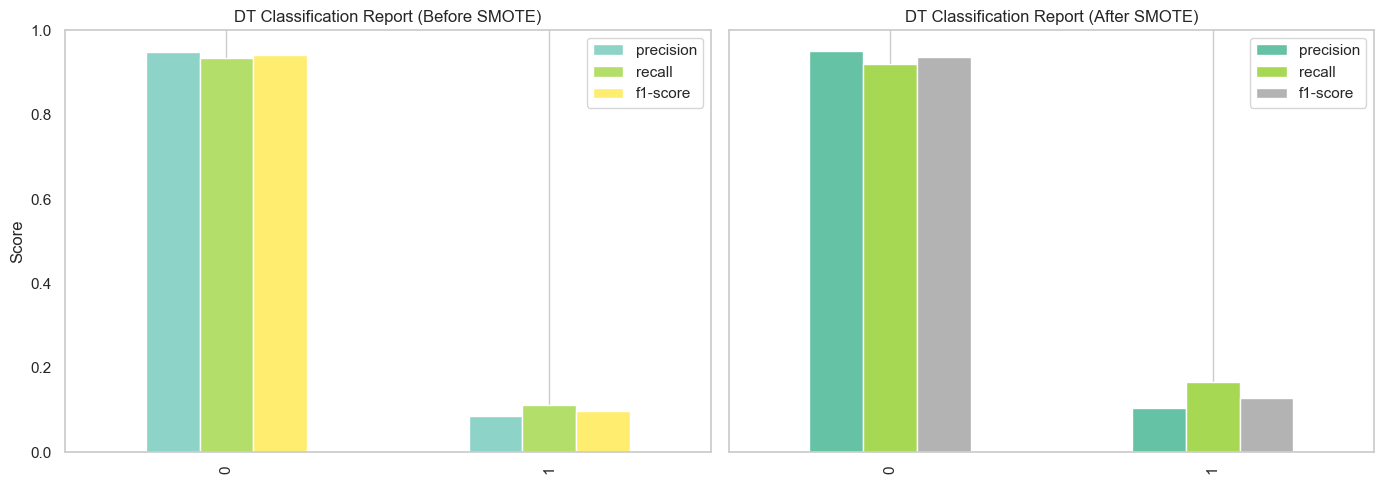

In [113]:
# Generate classification reports as dicts
report_dt_before = classification_report(y_test, y_pred_dt, output_dict=True)
report_dt_after = classification_report(y_test, y_pred_dt_smote, output_dict=True)

# Convert to DataFrames and select only class 0 and 1
df_dt_before = pd.DataFrame(report_dt_before).transpose().iloc[:2, :3]
df_dt_after = pd.DataFrame(report_dt_after).transpose().iloc[:2, :3]

# Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

df_dt_before.plot(kind='bar', ax=axes[0], colormap='Set3', ylim=(0, 1))
axes[0].set_title('DT Classification Report (Before SMOTE)')
axes[0].set_ylabel('Score')
axes[0].grid(axis='y')

df_dt_after.plot(kind='bar', ax=axes[1], colormap='Set2', ylim=(0, 1))
axes[1].set_title('DT Classification Report (After SMOTE)')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


## Confusion matrix Visualization

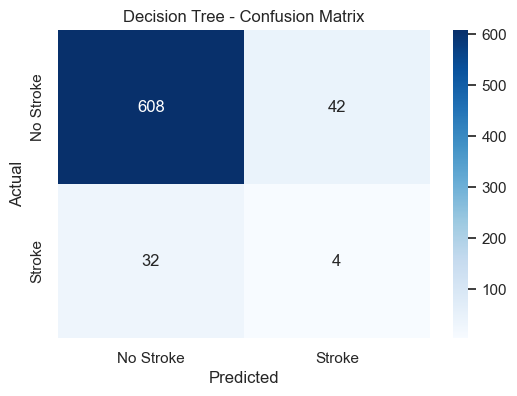

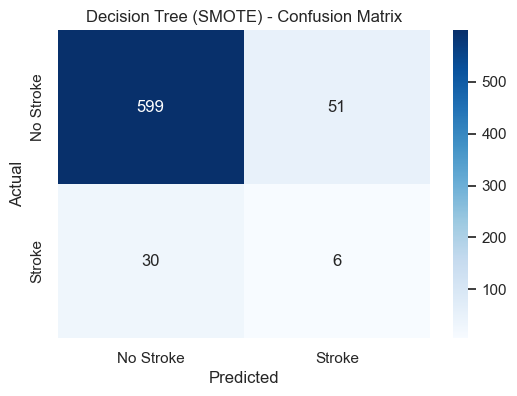

In [114]:
# Confusion matrix values (before SMOTE)
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix values (after SMOTE)
cm = confusion_matrix(y_test, y_pred_dt_smote)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Decision Tree (SMOTE) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# naive bayes


In [93]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


nb_model_SMOTE = GaussianNB()
nb_model_SMOTE.fit(X_train_resampled, y_train_resampled)


GaussianNB()

In [94]:
y_pred = nb_model.predict(X_test)
y_pred_smote_naive = nb_model_SMOTE.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[179 471]
 [  0  36]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.28      0.43       650
           1       0.07      1.00      0.13        36

    accuracy                           0.31       686
   macro avg       0.54      0.64      0.28       686
weighted avg       0.95      0.31      0.42       686

Accuracy Score: 0.31341107871720114


In [96]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote_naive))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote_naive))
print("Accuracy Score:", accuracy_score(y_test, y_pred_smote_naive))

Confusion Matrix:
 [[177 473]
 [  4  32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.27      0.43       650
           1       0.06      0.89      0.12        36

    accuracy                           0.30       686
   macro avg       0.52      0.58      0.27       686
weighted avg       0.93      0.30      0.41       686

Accuracy Score: 0.30466472303207


<h1> using the pca components in Naive </h1>

In [97]:
# Create PCA model for naive
pca_2 = PCA(n_components=3)

# Fit and transform the data
X_pca_2 = pca_2.fit_transform(X_scaled)
cumulative_variance = np.cumsum(pca_2.explained_variance_ratio_)
print(cumulative_variance)



[0.36042942 0.55297294 0.71861139]


In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Split the data into training and testing sets
X_train_naive1, X_test_naive1, y_train_naive1, y_test_naive1 = train_test_split(X_pca_2, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_model_pca = GaussianNB()

# Train the Naive Bayes model
nb_model_pca.fit(X_train_naive1, y_train_naive1)

# Make predictions on the test set
y_pred_nai = nb_model_pca.predict(X_test_naive1)

# Evaluate the model
accuracy = accuracy_score(y_test_naive1, y_pred_nai)
report = classification_report(y_test_naive1, y_pred_nai)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.90020366598778
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       929
           1       0.22      0.32      0.26        53

    accuracy                           0.90       982
   macro avg       0.59      0.63      0.60       982
weighted avg       0.92      0.90      0.91       982



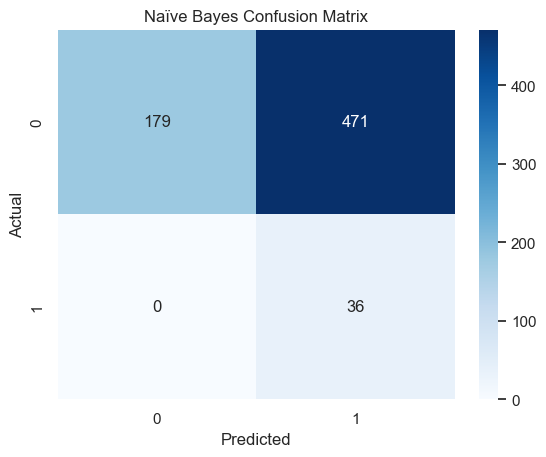

In [99]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Naïve Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred, target_names=['No Stroke', 'Stroke'])
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[179 471]
 [  0  36]]

Classification Report:
               precision    recall  f1-score   support

   No Stroke       1.00      0.28      0.43       650
      Stroke       0.07      1.00      0.13        36

    accuracy                           0.31       686
   macro avg       0.54      0.64      0.28       686
weighted avg       0.95      0.31      0.42       686



Shape of y_test: (686,)
Shape of y_pred: (686,)


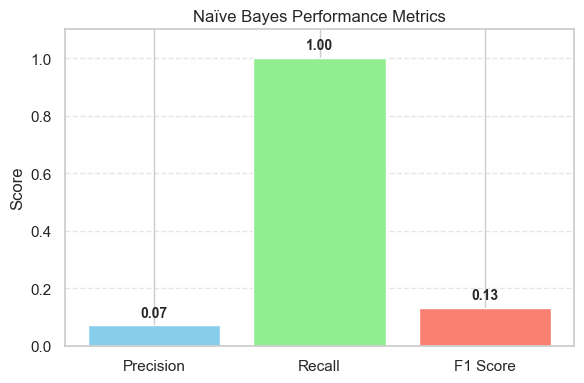

In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Check the shapes of y_test and y_pred
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Ensure the predictions match the length of y_test
if y_test.shape[0] == y_pred.shape[0]:
    # Calculate metrics if shapes match
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Plot bar chart
    metrics = [precision, recall, f1]
    labels = ['Precision', 'Recall', 'F1 Score']
    colors = ['skyblue', 'lightgreen', 'salmon']

    plt.figure(figsize=(6,4))
    bars = plt.bar(labels, metrics, color=colors)

    # Add metric values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.ylim(0, 1.1)
    plt.title('Naïve Bayes Performance Metrics')
    plt.ylabel('Score')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Mismatch in the number of samples between y_test and y_pred.")


In [102]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

# Ensure that the input data is properly encoded as integers
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Replace negative values (-1) with 0
X_train_encoded[X_train_encoded < 0] = 0
X_test_encoded[X_test_encoded < 0] = 0

# Initialize the Categorical Naive Bayes model
categorical_nb_model = CategoricalNB()

# Train the model
categorical_nb_model.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred_categorical = categorical_nb_model.predict(X_test_encoded)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_categorical))
print("\nClassification Report:\n", classification_report(y_test, y_pred_categorical))
accuracy_categorical_nb = accuracy_score(y_test, y_pred_categorical)
print("Accuracy Score:", accuracy_categorical_nb)

Confusion Matrix:
 [[640  10]
 [ 34   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       650
           1       0.17      0.06      0.08        36

    accuracy                           0.94       686
   macro avg       0.56      0.52      0.53       686
weighted avg       0.91      0.94      0.92       686

Accuracy Score: 0.9358600583090378


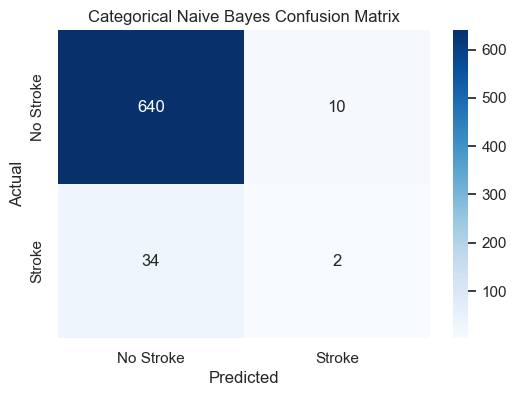

In [103]:


# Confusion matrix values
cm = confusion_matrix(y_test, y_pred_categorical)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.title("Categorical Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

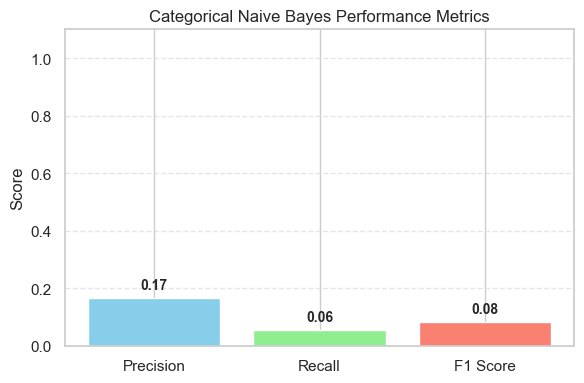

In [104]:
# Metrics
metrics = [precision_score(y_test, y_pred_categorical), recall_score(y_test, y_pred_categorical), f1_score(y_test, y_pred_categorical)]
labels = ['Precision', 'Recall', 'F1 Score']
colors = ['skyblue', 'lightgreen', 'salmon']

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, metrics, color=colors)

# Add metric values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylim(0, 1.1)
plt.title('Categorical Naive Bayes Performance Metrics')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1>Tuning hyperparameters and plotting of SVM using Grid search</h1>

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.8369829683698298


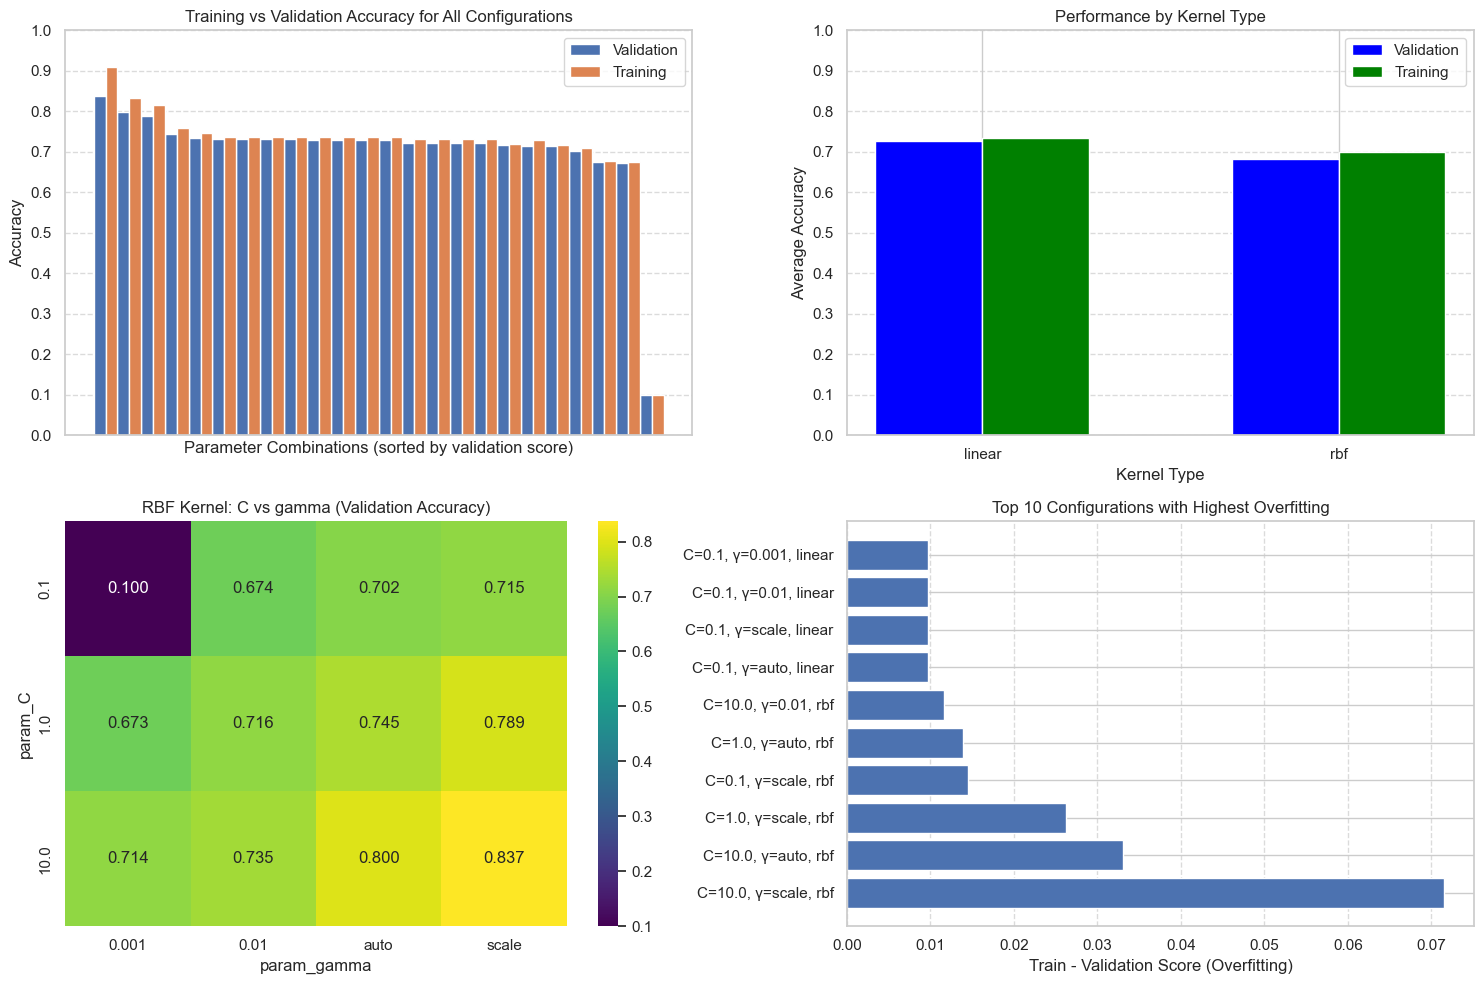

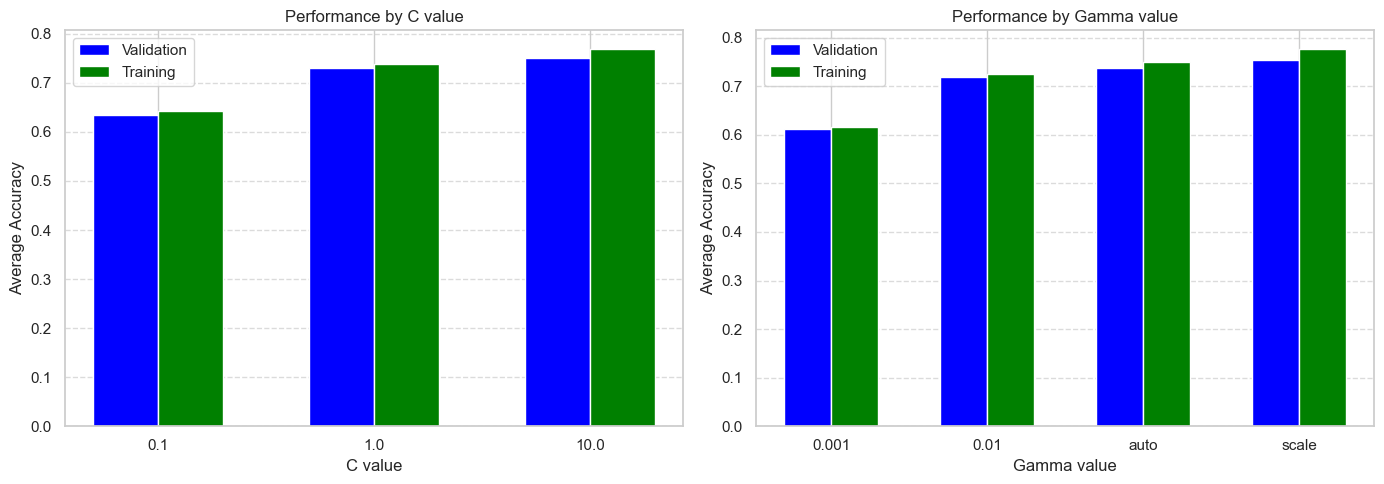


Top 5 Best Configurations:
Rank 17: C=10.0, γ=scale, rbf - Val: 0.8370, Train: 0.9085
Rank 19: C=10.0, γ=auto, rbf - Val: 0.7995, Train: 0.8326
Rank 9: C=1.0, γ=scale, rbf - Val: 0.7893, Train: 0.8156
Rank 11: C=1.0, γ=auto, rbf - Val: 0.7450, Train: 0.7589
Rank 21: C=10.0, γ=0.01, rbf - Val: 0.7348, Train: 0.7465


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns




# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Perform grid search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, 
                          return_train_score=True)  
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Convert results to a DataFrame for easier manipulation
results = pd.DataFrame(grid_search.cv_results_)

# Extract the parameter combinations
params = []
for i in range(len(results)):
    params.append(f"C={results['param_C'][i]}, γ={results['param_gamma'][i]}, {results['param_kernel'][i]}")
    
results['params'] = params

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plot 1: Overall comparison of validation and training scores
plt.subplot(2, 2, 1)
# Sort by validation score
sorted_idx = results['mean_test_score'].argsort()[::-1]
plt.bar(np.arange(len(sorted_idx)), 
        results.loc[sorted_idx, 'mean_test_score'], 
        width=0.5, label='Validation')
plt.bar(np.arange(len(sorted_idx)) + 0.5, 
        results.loc[sorted_idx, 'mean_train_score'], 
        width=0.5, label='Training')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks([])
plt.xlabel('Parameter Combinations (sorted by validation score)')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy for All Configurations')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Comparing performance by kernel type
plt.subplot(2, 2, 2)
kernel_results = results.groupby('param_kernel').agg({
    'mean_test_score': 'mean', 
    'mean_train_score': 'mean'
}).reset_index()

barWidth = 0.3
r1 = np.arange(len(kernel_results))
r2 = [x + barWidth for x in r1]

plt.bar(r1, kernel_results['mean_test_score'], width=barWidth, label='Validation', color='blue')
plt.bar(r2, kernel_results['mean_train_score'], width=barWidth, label='Training', color='green')
plt.xticks([r + barWidth/2 for r in r1], kernel_results['param_kernel'])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Kernel Type')
plt.ylabel('Average Accuracy')
plt.title('Performance by Kernel Type')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Heatmap for RBF kernel (C vs gamma)
plt.subplot(2, 2, 3)
rbf_results = results[results['param_kernel'] == 'rbf'].copy()
rbf_pivot = rbf_results.pivot_table(
    values='mean_test_score', 
    index='param_C',
    columns='param_gamma'
)
sns.heatmap(rbf_pivot, annot=True, cmap='viridis', fmt='.3f')
plt.title('RBF Kernel: C vs gamma (Validation Accuracy)')

# Plot 4: Overfitting analysis (train-test score difference)
plt.subplot(2, 2, 4)
results['score_diff'] = results['mean_train_score'] - results['mean_test_score']
# Show top 10 configurations with the most overfitting
top_overfit = results.sort_values('score_diff', ascending=False).head(10)
top_overfit_params = top_overfit['params'].values
top_overfit_diff = top_overfit['score_diff'].values

plt.barh(np.arange(len(top_overfit_diff)), top_overfit_diff)
plt.yticks(np.arange(len(top_overfit_diff)), top_overfit_params)
plt.xlabel('Train - Validation Score (Overfitting)')
plt.title('Top 10 Configurations with Highest Overfitting')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../visuals/svm_hyperparameter_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional plot: Performance by C value
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
c_results = results.groupby('param_C').agg({
    'mean_test_score': 'mean', 
    'mean_train_score': 'mean'
}).reset_index()

barWidth = 0.3
r1 = np.arange(len(c_results))
r2 = [x + barWidth for x in r1]

plt.bar(r1, c_results['mean_test_score'], width=barWidth, label='Validation', color='blue')
plt.bar(r2, c_results['mean_train_score'], width=barWidth, label='Training', color='green')
plt.xticks([r + barWidth/2 for r in r1], c_results['param_C'])
plt.xlabel('C value')
plt.ylabel('Average Accuracy')
plt.title('Performance by C value')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Performance by gamma value
plt.subplot(1, 2, 2)
# Filter out numeric gamma values for easier comparison
gamma_results = results.groupby('param_gamma').agg({
    'mean_test_score': 'mean', 
    'mean_train_score': 'mean'
}).reset_index()

r1 = np.arange(len(gamma_results))
r2 = [x + barWidth for x in r1]

plt.bar(r1, gamma_results['mean_test_score'], width=barWidth, label='Validation', color='blue')
plt.bar(r2, gamma_results['mean_train_score'], width=barWidth, label='Training', color='green')
plt.xticks([r + barWidth/2 for r in r1], gamma_results['param_gamma'])
plt.xlabel('Gamma value')
plt.ylabel('Average Accuracy')
plt.title('Performance by Gamma value')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../visuals/svm_hyperparameter_analysis_by_param.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the top 5 best performing configurations
print("\nTop 5 Best Configurations:")
top5 = results.sort_values('mean_test_score', ascending=False).head(5)
for i, row in top5.iterrows():
    print(f"Rank {i+1}: {row['params']} - Val: {row['mean_test_score']:.4f}, Train: {row['mean_train_score']:.4f}")

<h1>the test accuracy of SVM after tuning </h1>

In [106]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy using Best GridSearchCV Model: {test_accuracy:.4f}")
print("the original model test accuracy : 0.7546")
print("the model accuracy increased by 20%")


Test Accuracy using Best GridSearchCV Model: 0.8411
the original model test accuracy : 0.7546
the model accuracy increased by 20%


<h1>tune svm using optuna</h1>

In [107]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define Optuna objective function
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e0)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'linear'])

    model = SVC(C=C, gamma=gamma, kernel=kernel, class_weight='balanced')
    return cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

# Run Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Best hyperparameters
print("Best Params:", study.best_params)
print("Best Cross-Validation Accuracy:", study.best_value)

# Retrain model with best parameters on full training set
best_model_svopt = SVC(**study.best_params, class_weight='balanced')
best_model_svopt.fit(X_train, y_train)

# Evaluate on test set
y_test_pred = best_model_svopt.predict(X_test)
test_accuracy_optuna = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Optuna):", test_accuracy_optuna)


[I 2025-05-05 10:51:32,241] A new study created in memory with name: no-name-362aae83-4a29-493a-935d-76e0e5e07c21
C:\Users\User\AppData\Local\Temp\ipykernel_3524\170826905.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)
C:\Users\User\AppData\Local\Temp\ipykernel_3524\170826905.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-4, 1e0)
[I 2025-05-05 10:51:33,060] Trial 0 finished with value: 0.6861313868613139 and parameters: {'C': 0.09281154169797219, 'gamma': 0.018714934108327815, 'kernel': 'rbf'}. Best is trial 0 with value: 0.6861313868613139.
C:\Users\User\AppData\Local\Te

KeyboardInterrupt: 

<h1>Tuning hyperparameters for Naive Bayes using Grid search </h1>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Parameter grid
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}




# Grid search
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1, 
                              return_train_score=True)  
grid_search_nb.fit(X_train, y_train)


# Best model
best_nb_model = grid_search_nb.best_estimator_

# Predict on test set
y_nb_pred = best_nb_model.predict(X_test)

# Accuracy
test_accuracy_nb = accuracy_score(y_test, y_nb_pred)

# Output
print("Best Parameters (NB):", grid_search_nb.best_params_)
print("Test Accuracy (NB):", test_accuracy_nb)


Best Parameters (NB): {'var_smoothing': 1e-06}
Test Accuracy (NB): 0.5553935860058309


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Parameter grid
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}




# Grid search
grid_search_nb = GridSearchCV(nb_model_SMOTE, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1, 
                              return_train_score=True)  
grid_search_nb.fit(X_train_resampled, y_train_resampled)


# Best model
best_nb_model = grid_search_nb.best_estimator_

# Predict on test set
y_nb_pred = best_nb_model.predict(X_test)

# Accuracy
test_accuracy_nb = accuracy_score(y_test, y_nb_pred)

# Output
print("Best Parameters (NB):", grid_search_nb.best_params_)
print("Test Accuracy (NB):", test_accuracy_nb)


Best Parameters (NB): {'var_smoothing': 1e-06}
Test Accuracy (NB): 0.37317784256559766


<H1> plots of naive tuning </h1>

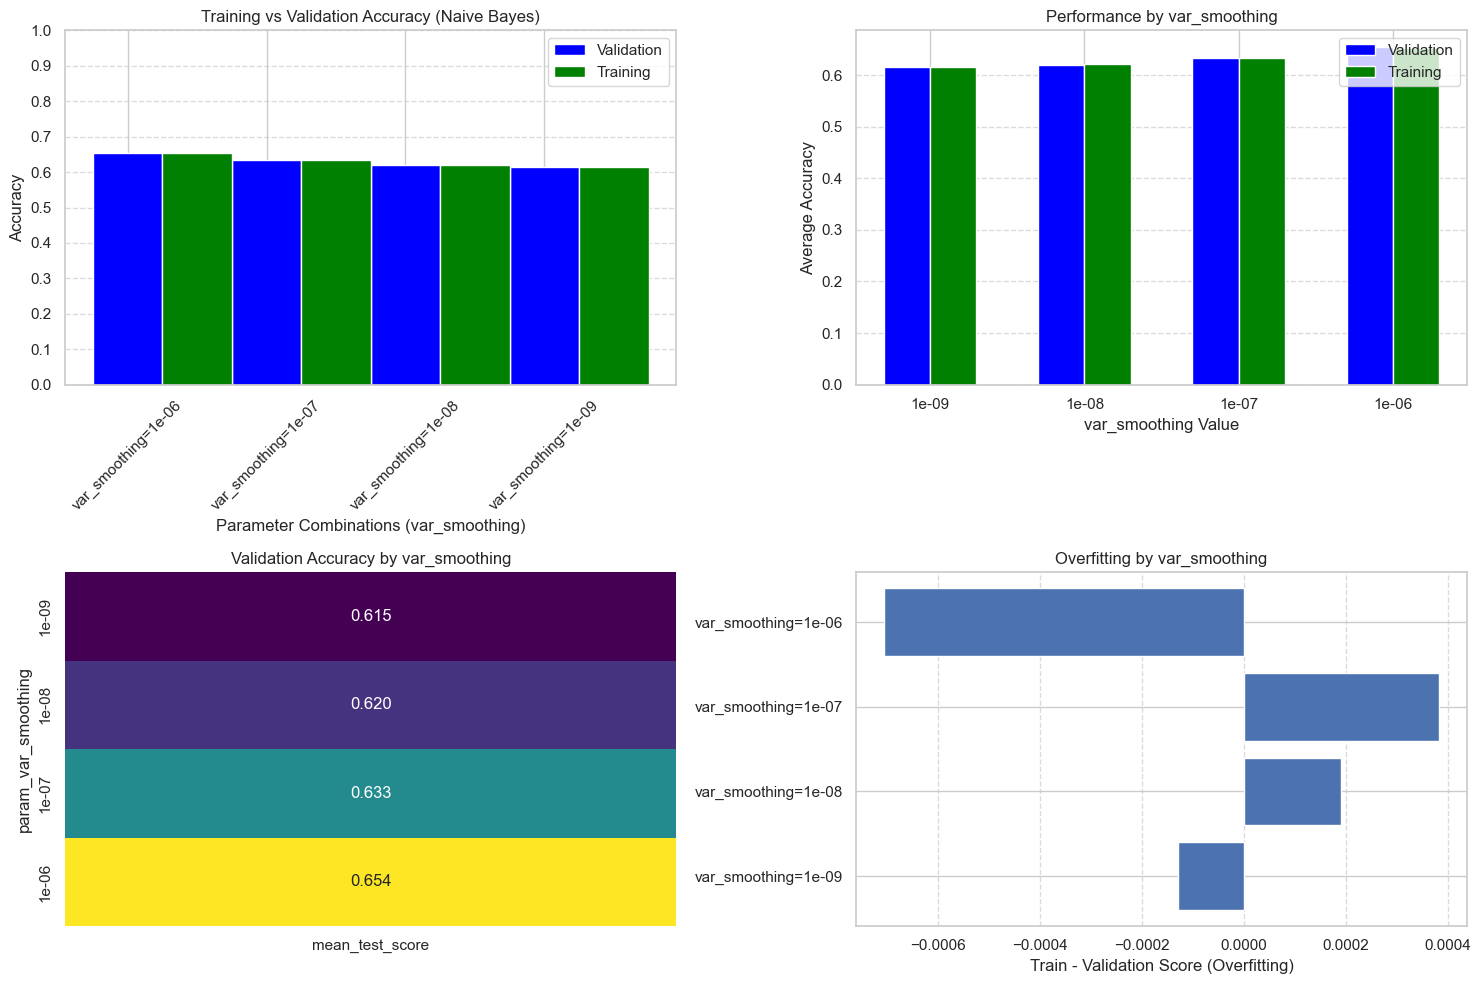


Top Best Configurations (Naive Bayes):
var_smoothing=1e-06: Val=0.6538, Train=0.6531
var_smoothing=1e-07: Val=0.6333, Train=0.6337
var_smoothing=1e-08: Val=0.6204, Train=0.6206
var_smoothing=1e-09: Val=0.6148, Train=0.6147


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# === Prepare results DataFrame ===
results_nb = pd.DataFrame(grid_search_nb.cv_results_)

# Extract the parameter combinations
params_nb = []
for i in range(len(results_nb)):
    params_nb.append(f"var_smoothing={results_nb['param_var_smoothing'][i]}")
    
results_nb['params'] = params_nb

# === Start Plotting ===

plt.figure(figsize=(15, 10))

# Plot 1: Overall comparison of validation and training scores
plt.subplot(2, 2, 1)
# Sort by validation score
sorted_idx_nb = results_nb['mean_test_score'].argsort()[::-1]
plt.bar(np.arange(len(sorted_idx_nb)), 
        results_nb.loc[sorted_idx_nb, 'mean_test_score'], 
        width=0.5, label='Validation', color='blue')
plt.bar(np.arange(len(sorted_idx_nb)) + 0.5, 
        results_nb.loc[sorted_idx_nb, 'mean_train_score'], 
        width=0.5, label='Training', color='green')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(len(params_nb)), results_nb.loc[sorted_idx_nb, 'params'], rotation=45)
plt.xlabel('Parameter Combinations (var_smoothing)')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Naive Bayes)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Performance by var_smoothing value
plt.subplot(2, 2, 2)
smoothing_results = results_nb.groupby('param_var_smoothing').agg({
    'mean_test_score': 'mean', 
    'mean_train_score': 'mean'
}).reset_index()

barWidth = 0.3
r1 = np.arange(len(smoothing_results))
r2 = [x + barWidth for x in r1]

plt.bar(r1, smoothing_results['mean_test_score'], width=barWidth, label='Validation', color='blue')
plt.bar(r2, smoothing_results['mean_train_score'], width=barWidth, label='Training', color='green')
plt.xticks([r + barWidth/2 for r in r1], smoothing_results['param_var_smoothing'])
plt.xlabel('var_smoothing Value')
plt.ylabel('Average Accuracy')
plt.title('Performance by var_smoothing')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Heatmap (since only one parameter, this will be a simple table)
plt.subplot(2, 2, 3)
smoothing_heatmap = smoothing_results.pivot_table(
    values='mean_test_score', 
    index='param_var_smoothing'
)
sns.heatmap(smoothing_heatmap, annot=True, cmap='viridis', fmt='.3f', cbar=False)
plt.title('Validation Accuracy by var_smoothing')

# Plot 4: Overfitting analysis (train-test score difference)
plt.subplot(2, 2, 4)
results_nb['score_diff'] = results_nb['mean_train_score'] - results_nb['mean_test_score']
# Show all configurations since they're few
overfit_params_nb = results_nb['params'].values
overfit_diff_nb = results_nb['score_diff'].values

plt.barh(np.arange(len(overfit_diff_nb)), overfit_diff_nb)
plt.yticks(np.arange(len(overfit_diff_nb)), overfit_params_nb)
plt.xlabel('Train - Validation Score (Overfitting)')
plt.title('Overfitting by var_smoothing')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../visuals/naive_bayes_hyperparameter_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the top 5 best performing configurations
print("\nTop Best Configurations (Naive Bayes):")
top_nb = results_nb.sort_values('mean_test_score', ascending=False)
for i, row in top_nb.iterrows():
    print(f"var_smoothing={row['param_var_smoothing']}: Val={row['mean_test_score']:.4f}, Train={row['mean_train_score']:.4f}")


In [ ]:
# Evaluate best Naive Bayes model on the test set
y_test_pred_nb = best_nb_model.predict(X_test)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
print("Test Accuracy (Naive Bayes):", test_accuracy_nb)


Test Accuracy (Naive Bayes): 0.37317784256559766


<h1>tune Naive using optuna</h1>

In [ ]:
import optuna
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest a value for var_smoothing (on a log scale)
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-12, 1e-5)

    # Create the model with this var_smoothing
    model = GaussianNB(var_smoothing=var_smoothing)

    # Cross-validation to evaluate performance
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return score

# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # You can change n_trials as you wish (e.g., 100 for better search)

# Best hyperparameters and best score
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)


[I 2025-05-05 09:53:29,946] A new study created in memory with name: no-name-efe65579-f3e1-4d8c-b42d-7c27d7cbbaa9
C:\Users\User\AppData\Local\Temp\ipykernel_11072\2685406236.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-12, 1e-5)
[W 2025-05-05 09:53:29,948] Trial 0 failed with parameters: {'var_smoothing': 3.2151695552401615e-09} because of the following error: NameError("name 'X_train_scaled' is not defined").
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_11072\2685406236.py", line 14, in objective
    score = cross_val_score(model, X_train_scaled, y_train, c

NameError: name 'X_train_scaled' is not defined

In [ ]:
# Train final model
best_var_smoothing = study.best_params['var_smoothing']
best_nb_model_optuna = GaussianNB(var_smoothing=best_var_smoothing)
best_nb_model_optuna.fit(X_train, y_train)

# Evaluate on test set
y_test_pred_nb_optuna = best_nb_model_optuna.predict(X_test)
test_accuracy_nb_optuna = accuracy_score(y_test, y_test_pred_nb_optuna)
print("Test Accuracy (Naive Bayes Optuna):", test_accuracy_nb_optuna)


ValueError: No trials are completed yet.

In [ ]:
#from sklearn.naive_bayes import CategoricalNB

# Initialize the Categorical Naive Bayes model
#categorical_nb_model = CategoricalNB()

# Train the model
#categorical_nb_model.fit(X_train, y_train)

# Predict on the test set
#y_pred_categorical = categorical_nb_model.predict(X_test)

# Evaluate the model
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_categorical))
#print("\nClassification Report:\n", classification_report(y_test, y_pred_categorical))
#accuracy_categorical_nb = accuracy_score(y_test, y_pred_categorical)
#print("Accuracy Score:", accuracy_categorical_nb)

ValueError: Negative values in data passed to CategoricalNB (input X)

## GRID SEARCH FOR DECISION TREE


In [ ]:
#before SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, 
                              return_train_score=True, verbose=1)
grid_search_dt.fit(X_train, y_train)

# Best model
best_dt_model = grid_search_dt.best_estimator_

# Predict on test set
y_dt_pred = best_dt_model.predict(X_test)

# Accuracy
test_accuracy_dt = accuracy_score(y_test, y_dt_pred)

# Output
print("Best Parameters (Decision Tree):", grid_search_dt.best_params_)
print("Test Accuracy (Decision Tree):", test_accuracy_dt)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Test Accuracy (Decision Tree): 0.9431486880466472


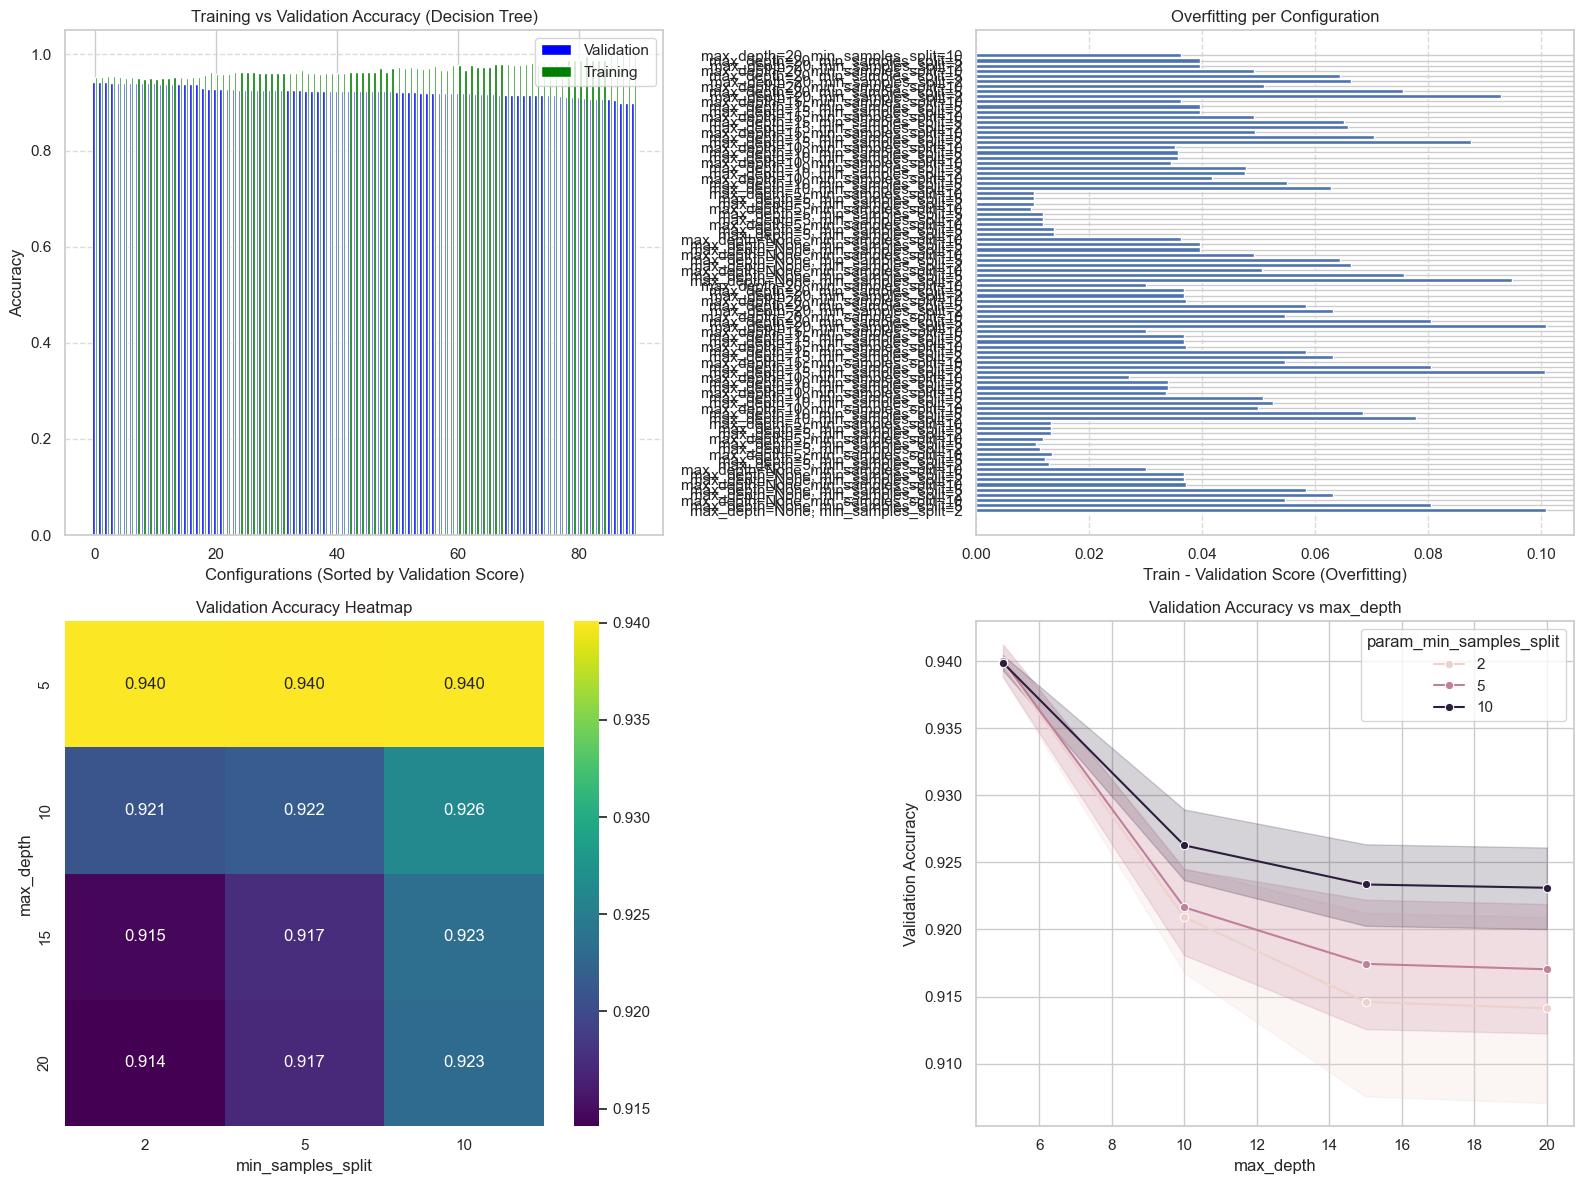


Top Best Configurations (Decision Tree):
max_depth=5, min_samples_split=5 -> Val=0.9426, Train=0.9532
max_depth=5, min_samples_split=5 -> Val=0.9421, Train=0.9544
max_depth=5, min_samples_split=2 -> Val=0.9421, Train=0.9534
max_depth=5, min_samples_split=2 -> Val=0.9416, Train=0.9546
max_depth=5, min_samples_split=10 -> Val=0.9406, Train=0.9524


In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# === Prepare results DataFrame ===
results_dt = pd.DataFrame(grid_search_dt.cv_results_)

# Combine parameter names for labeling (adjust as needed)
params_dt = []
for i in range(len(results_dt)):
    label = f"max_depth={results_dt['param_max_depth'][i]}, min_samples_split={results_dt['param_min_samples_split'][i]}"
    params_dt.append(label)

results_dt['params'] = params_dt

# === Start Plotting ===

plt.figure(figsize=(16, 12))

# Plot 1: Training vs Validation Accuracy (Grouped Bar Chart)
plt.subplot(2, 2, 1)
sorted_idx = results_dt['mean_test_score'].argsort()[::-1]
x = np.arange(len(sorted_idx))  # X-axis positions
width = 0.4  # Width of the bars

# Plot validation and training scores as grouped bars
plt.bar(x - width/2, results_dt.loc[sorted_idx, 'mean_test_score'], width=width, label='Validation', color='blue')
plt.bar(x + width/2, results_dt.loc[sorted_idx, 'mean_train_score'], width=width, label='Training', color='green')

plt.xlabel('Configurations (Sorted by Validation Score)')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Decision Tree)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Overfitting Analysis (Train - Test)
plt.subplot(2, 2, 2)
results_dt['score_diff'] = results_dt['mean_train_score'] - results_dt['mean_test_score']
overfit_params = results_dt['params'].values
overfit_diff = results_dt['score_diff'].values
plt.barh(np.arange(len(overfit_diff)), overfit_diff)
plt.yticks(np.arange(len(overfit_diff)), overfit_params)
plt.xlabel('Train - Validation Score (Overfitting)')
plt.title('Overfitting per Configuration')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Plot 3: Heatmap of mean_test_score by parameters
plt.subplot(2, 2, 3)
heatmap_data = results_dt.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_min_samples_split'
)
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis')
plt.title('Validation Accuracy Heatmap')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')

# Plot 4: Lineplot of validation accuracy over max_depth
plt.subplot(2, 2, 4)
sns.lineplot(data=results_dt, x='param_max_depth', y='mean_test_score', hue='param_min_samples_split', marker='o')
plt.title('Validation Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Validation Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

# Top results
print("\nTop Best Configurations (Decision Tree):")
top_dt = results_dt.sort_values('mean_test_score', ascending=False)
for i, row in top_dt.head(5).iterrows():
    print(f"max_depth={row['param_max_depth']}, min_samples_split={row['param_min_samples_split']} -> Val={row['mean_test_score']:.4f}, Train={row['mean_train_score']:.4f}")

In [115]:
#after SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the model
dt_model_smote = DecisionTreeClassifier(random_state=42)

# Parameter grid
param_grid_dt_smote = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search_dt_smote = GridSearchCV(
    dt_model_smote, param_grid_dt_smote, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True, verbose=1
)
grid_search_dt_smote.fit(X_train_resampled, y_train_resampled)

# Best model
best_dt_model_smote = grid_search_dt_smote.best_estimator_

# Predict on test set
y_dt_pred_smote = best_dt_model_smote.predict(X_test)

# Accuracy
test_accuracy_dt_smote = accuracy_score(y_test, y_dt_pred_smote)

# Output
print("Best Parameters (Decision Tree After SMOTE):", grid_search_dt_smote.best_params_)
print("Test Accuracy (Decision Tree After SMOTE):", test_accuracy_dt_smote)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters (Decision Tree After SMOTE): {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test Accuracy (Decision Tree After SMOTE): 0.8717201166180758


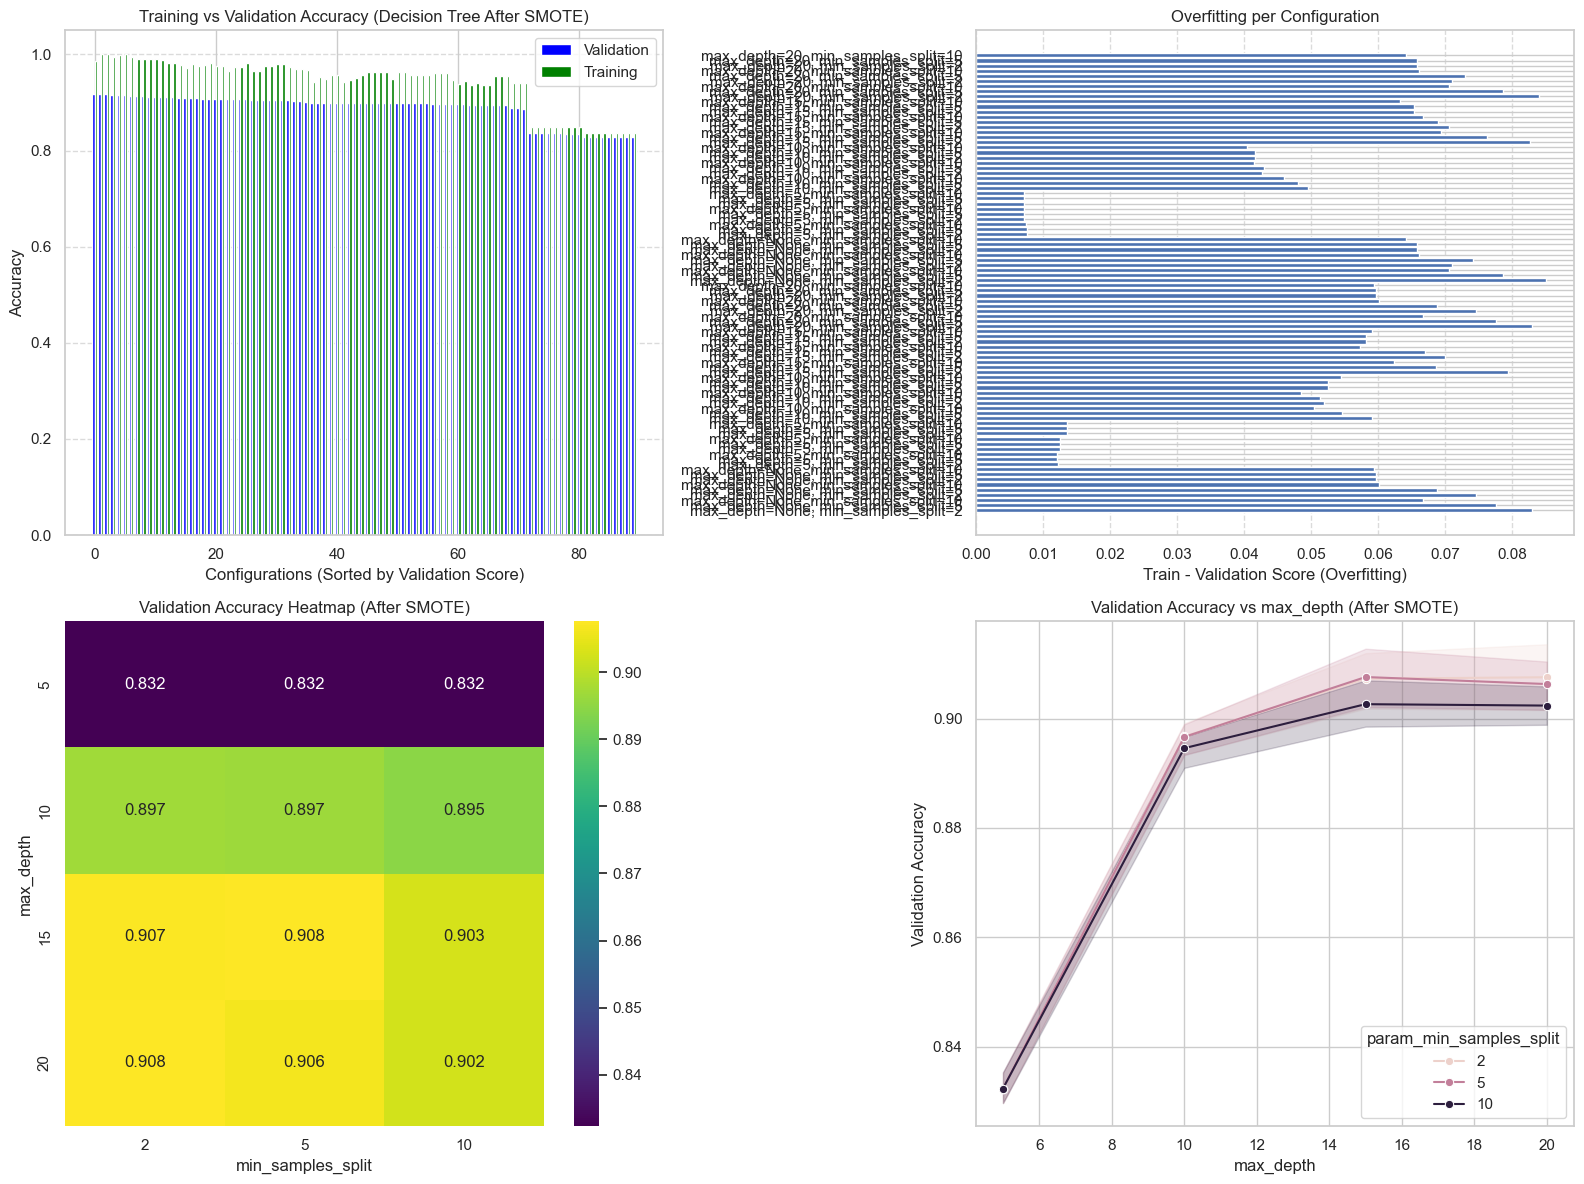

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Prepare results DataFrame
results_dt_smote = pd.DataFrame(grid_search_dt_smote.cv_results_)

# Combine parameter names for labeling
params_dt_smote = []
for i in range(len(results_dt_smote)):
    label = f"max_depth={results_dt_smote['param_max_depth'][i]}, min_samples_split={results_dt_smote['param_min_samples_split'][i]}"
    params_dt_smote.append(label)

results_dt_smote['params'] = params_dt_smote

# Start Plotting
plt.figure(figsize=(16, 12))

# Plot 1: Training vs Validation Accuracy (Grouped Bar Chart)
plt.subplot(2, 2, 1)
sorted_idx = results_dt_smote['mean_test_score'].argsort()[::-1]
x = np.arange(len(sorted_idx))  # X-axis positions
width = 0.4  # Width of the bars

# Plot validation and training scores as grouped bars
plt.bar(x - width/2, results_dt_smote.loc[sorted_idx, 'mean_test_score'], width=width, label='Validation', color='blue')
plt.bar(x + width/2, results_dt_smote.loc[sorted_idx, 'mean_train_score'], width=width, label='Training', color='green')

plt.xlabel('Configurations (Sorted by Validation Score)')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy (Decision Tree After SMOTE)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Overfitting Analysis (Train - Test)
plt.subplot(2, 2, 2)
results_dt_smote['score_diff'] = results_dt_smote['mean_train_score'] - results_dt_smote['mean_test_score']
overfit_params = results_dt_smote['params'].values
overfit_diff = results_dt_smote['score_diff'].values
plt.barh(np.arange(len(overfit_diff)), overfit_diff)
plt.yticks(np.arange(len(overfit_diff)), overfit_params)
plt.xlabel('Train - Validation Score (Overfitting)')
plt.title('Overfitting per Configuration')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Plot 3: Heatmap of mean_test_score by parameters
plt.subplot(2, 2, 3)
heatmap_data = results_dt_smote.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_min_samples_split'
)
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis')
plt.title('Validation Accuracy Heatmap (After SMOTE)')
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')

# Plot 4: Lineplot of validation accuracy over max_depth
plt.subplot(2, 2, 4)
sns.lineplot(data=results_dt_smote, x='param_max_depth', y='mean_test_score', hue='param_min_samples_split', marker='o')
plt.title('Validation Accuracy vs max_depth (After SMOTE)')
plt.xlabel('max_depth')
plt.ylabel('Validation Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

## optuna for decision tree


In [ ]:
#before SMOTE    
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Create the Decision Tree model with suggested hyperparameters
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=42
    )

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return score

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

# Print the best hyperparameters and the best score
print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

# Train the final model with the best hyperparameters
best_params = study.best_params
final_model = DecisionTreeClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy (Decision Tree with Optuna):", test_accuracy)

[I 2025-05-05 10:52:50,537] A new study created in memory with name: no-name-3aa7f1b4-bcaa-4464-87cd-09c6195ecb68
[I 2025-05-05 10:52:50,581] Trial 0 finished with value: 0.940632603406326 and parameters: {'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 8, 'criterion': 'entropy'}. Best is trial 0 with value: 0.940632603406326.
[I 2025-05-05 10:52:50,622] Trial 1 finished with value: 0.9474452554744526 and parameters: {'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 4, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9474452554744526.
[I 2025-05-05 10:52:50,651] Trial 2 finished with value: 0.9309002433090023 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 4, 'criterion': 'entropy'}. Best is trial 1 with value: 0.9474452554744526.
[I 2025-05-05 10:52:50,682] Trial 3 finished with value: 0.9440389294403893 and parameters: {'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 6, 'criterion': 'gini'}. Best is trial 1 with 

Best parameters: {'max_depth': 4, 'min_samples_split': 18, 'min_samples_leaf': 4, 'criterion': 'entropy'}
Best cross-validation accuracy: 0.9474452554744526
Test Accuracy (Decision Tree with Optuna): 0.9460641399416909


In [111]:
import optuna.visualization as vis

# Plot optimization history
optuna_history_plot = vis.plot_optimization_history(study)
optuna_history_plot.show()

# Plot parameter importance
optuna_param_importance_plot = vis.plot_param_importances(study)
optuna_param_importance_plot.show()

# Plot parallel coordinate plot for parameter interactions
optuna_parallel_plot = vis.plot_parallel_coordinate(study)
optuna_parallel_plot.show()

# Plot slice plot for parameter exploration
optuna_slice_plot = vis.plot_slice(study)
optuna_slice_plot.show()

In [116]:

#after SMOTE
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective_smote(trial):
    # Suggest hyperparameters
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Create the Decision Tree model with suggested hyperparameters
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=42
    )

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1).mean()
    return score

# Create an Optuna study and optimize
study_smote = optuna.create_study(direction='maximize')
study_smote.optimize(objective_smote, n_trials=50)  # Adjust n_trials as needed

# Print the best hyperparameters and the best score
print("Best parameters (After SMOTE):", study_smote.best_params)
print("Best cross-validation accuracy (After SMOTE):", study_smote.best_value)

# Train the final model with the best hyperparameters
best_params_smote = study_smote.best_params
final_model_smote = DecisionTreeClassifier(**best_params_smote, random_state=42)
final_model_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate the final model on the test set
y_test_pred_smote = final_model_smote.predict(X_test)
test_accuracy_smote = accuracy_score(y_test, y_test_pred_smote)
print("Test Accuracy (Decision Tree with Optuna After SMOTE):", test_accuracy_smote)

[I 2025-05-05 10:59:33,341] A new study created in memory with name: no-name-3d7affec-e925-4352-b7a8-350060d97497
[I 2025-05-05 10:59:33,396] Trial 0 finished with value: 0.8852124040114708 and parameters: {'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 2, 'criterion': 'gini'}. Best is trial 0 with value: 0.8852124040114708.
[I 2025-05-05 10:59:33,450] Trial 1 finished with value: 0.8972837762473146 and parameters: {'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 1 with value: 0.8972837762473146.
[I 2025-05-05 10:59:33,508] Trial 2 finished with value: 0.9165428619514175 and parameters: {'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 2 with value: 0.9165428619514175.
[I 2025-05-05 10:59:33,563] Trial 3 finished with value: 0.878277139962578 and parameters: {'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1, 'criterion': 'entropy'}. Best is trial 2 with

Best parameters (After SMOTE): {'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1, 'criterion': 'gini'}
Best cross-validation accuracy (After SMOTE): 0.9165428619514175
Test Accuracy (Decision Tree with Optuna After SMOTE): 0.880466472303207


In [118]:
import optuna.visualization as vis

# Plot optimization history
optuna_history_plot = vis.plot_optimization_history(study_smote)
optuna_history_plot.show()

# Plot parameter importance
optuna_param_importance_plot = vis.plot_param_importances(study_smote)
optuna_param_importance_plot.show()

# Plot parallel coordinate plot for parameter interactions
optuna_parallel_plot = vis.plot_parallel_coordinate(study_smote)
optuna_parallel_plot.show()

# Plot slice plot for parameter exploration
optuna_slice_plot = vis.plot_slice(study_smote)
optuna_slice_plot.show()

Decision Tree Test Accuracy Comparison:
Before Tuning: 0.8921
After Tuning (Grid Search): 0.9431
After Tuning (Optuna): 0.8805


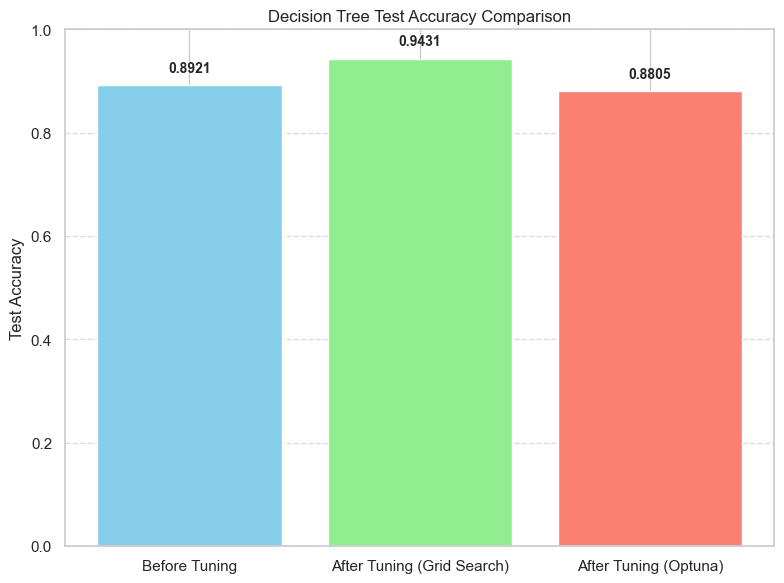

In [119]:
# Test accuracy before tuning
accuracy_before_tuning = accuracy_score(y_test, y_pred_dt)

# Test accuracy after tuning (Grid Search)
accuracy_after_tuning_grid = test_accuracy_dt

# Test accuracy after tuning (Optuna)
accuracy_after_tuning_optuna = test_accuracy_smote

# Print the comparison
print("Decision Tree Test Accuracy Comparison:")
print(f"Before Tuning: {accuracy_before_tuning:.4f}")
print(f"After Tuning (Grid Search): {accuracy_after_tuning_grid:.4f}")
print(f"After Tuning (Optuna): {accuracy_after_tuning_optuna:.4f}")

# Visualization
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Before Tuning', 'After Tuning (Grid Search)', 'After Tuning (Optuna)']
accuracies = [accuracy_before_tuning, accuracy_after_tuning_grid, accuracy_after_tuning_optuna]

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('Test Accuracy')
plt.title('Decision Tree Test Accuracy Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.4f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()